Student name: David Schenck<br>
Student pace: Flex<br>
Scheduled project review date/time: <br>
Instructor Name: Morgan Jones<br>
Blog post URL: 

# Project Description

Describe the project here

# Exploring the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

The main dataset contains information about the performance of players in the NFL Combine from 2009 to 2019.<br>
Source: https://www.kaggle.com/datasets/redlineracer/nfl-combine-performance-data-2009-2019

Columns in the dataset:
Year: Year player attended combine<br>
Player: Name of player and a unique code used by pro-football-reference.com.<br>
Age: Age of player when they attended the combine.<br>
School: College the player last attended.<br>
Height: Height of player in meters.<br>
Weight: Weight of player in kg.<br>
Sprint_40yd: Time in the 40-yard sprint.<br>
Vertical_Jump: Height of vertical jump in cm.<br>
Bench_Press_Reps: Number of times player could bench press 225 pounds consecutively.<br>
Broad_Jump: Distance player could jump from a standing position in cm.<br>
Agility_3cone: Time to complete 3-cone drill in seconds.<br>
Shuttle: Time to complete the 60-yard shuttle drill in seconds.<br>
Drafted..tm.rnd.yr.: If drafted, it gives the team, round, pick, and year.<br>
BMI: Body mass index.<br>
Player_Type: Offense, defense, or special teams.<br>
Position_Type: Puts positions into categories.<br>
Position: The specific position the player plays.<br>
Drafted: Yes or No.

**Fixes to Original Data**<br>
The original data had 550 players whose age was missing. This created a problem because only 2% of those players were drafted, but 77% of players with listed ages got drafted. This was a very strong systematic effect that biased the models.<br>

I went through all of the players with missing ages and searched for them online to get the missing data. I still wasn't able to find the ages for 35 of the players, but that is way better than missing 550. I also found that there were other issues with the data:<br>
1. There were 30 players who were listed as going undrafted, but were actually drafted. The vast majority of these were recent (from 2018 and 2019). I fixed these.<br>
2. Some players had the wrong school listed. These were also fixed.

I also went through the data to make sure it wasn't missing players who were drafted after attending the combine. From 2009-2017, there were about a dozen players like this who were missing. I manually added them to the data. However, in 2018 and 2019, it was clear that whoever compiled the data made some sort of mistake which led to missing players. In 2018, all of the linebackers were missing. In 2019, linebackers, defensive ends, defensive tackles, offensive guards, and centers were missing. I added all of these manually.

In all, 98 players were added to the data.

In [2]:
df_combine = pd.read_csv('./Data/NFL.csv')
df_combine

Year                     Player   Age        School    Height  \
0     2009      Beanie Wells\WellCh00  20.0      Ohio St.  1.854200   
1     2009        Will Davis\DaviWi99  22.0      Illinois  1.879600   
2     2009    Herman Johnson\JohnHe23  24.0           LSU  2.006600   
3     2009    Rashad Johnson\JohnRa98  23.0       Alabama  1.803400   
4     2009        Cody Brown\BrowCo96  22.0   Connecticut  1.879600   
...    ...                        ...   ...           ...       ...   
3570  2019       Jalen Jelks\JelkJa00  22.0        Oregon  1.965325   
3571  2019     Chris Slayton\SlayCh00  22.0      Syracuse  1.930400   
3572  2019   Javon Patterson\PattJa00  21.0   Mississippi  1.905000   
3573  2019      Dakota Allen\AlleDa01  23.0    Texas Tech  1.838325   
3574  2019  Jordan Brailford\BraiJo00  23.0  Oklahoma St.  1.905000   

          Weight  Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  \
0     106.594207         4.38          85.09              25.0      325.12   
1     118.387609         4.84          83.82              27.0      292.10   
2     165.107623         5.50            NaN              21.0         NaN   
3      92.079251         4.49          93.98              15.0      304.80   
4     110.676538         4.76          92.71              26.0      304.80   
...          ...          ...            ...               ...         ...   
3570  116.119647         4.92          82.55              19.0      287.02   
3571  139.252858         5.13          73.66              28.0      256.54   
3572  139.252858         5.13          69.85              27.0      248.92   
3573  105.233430         4.77          80.01              23.0      294.64   
3574  114.305277         4.65          95.25              22.0      320.04   

      Agility_3cone  Shuttle                            Drafted..tm.rnd.yr.  \
0               NaN      NaN     Arizona Cardinals / 1st / 31st pick / 2009   
1              7.38     4.45    Arizona Cardinals / 6th / 204th pick / 2009   
2               NaN      NaN    Arizona Cardinals / 5th / 167th pick / 2009   
3              7.09     4.23     Arizona Cardinals / 3rd / 95th pick / 2009   
4              7.10     4.40     Arizona Cardinals / 2nd / 63rd pick / 2009   
...             ...      ...                                            ...   
3570           7.22     4.59       Dallas Cowboys / 7th / 241st pick / 2019   
3571            NaN     4.73      New York Giants / 7th / 245th pick / 2019   
3572           7.72     4.78   Indianapolis Colts / 7th / 246th pick / 2019   
3573           6.88     4.04     Los Angeles Rams / 7th / 251st pick / 2019   
3574            NaN      NaN  Washington Redskins / 7th / 253rd pick / 2019   

            BMI Player_Type      Position_Type Position Drafted  
0     31.004194     offense    backs_receivers       RB     Yes  
1     33.510073     defense  defensive_lineman       DE     Yes  
2     41.005821     offense  offensive_lineman       OG     Yes  
3     28.312463     defense     defensive_back       FS     Yes  
4     31.327425     defense        line_backer      OLB     Yes  
...         ...         ...                ...      ...     ...  
3570  30.063321     defense  defensive_lineman       DE     Yes  
3571  37.368830     defense  defensive_lineman       DT     Yes  
3572  38.371975     offense  offensive_lineman        C     Yes  
3573  31.139321     defense        line_backer      ILB     Yes  
3574  31.497517     defense        line_backer      OLB     Yes  

[3575 rows x 18 columns]

The data below lists each player that made the Pro Bowl from 2009 to 2022. The Pro Bowl is the NFL All-Star team; the best few players at each position are chosen each year. This is a good measure of whether or not a player is succeeding as an NFL player.<br>

The only column in this data that I actually care about is Player-additional. This is a unique code for each player that is also included in the "Player" column in the Combine data. I can use this column to count how many Pro Bowls each player in the combine data has been in.

In [3]:
df_probowl = pd.read_excel('./Data/NFLProBowls.xlsx')
df_probowl

Pos           Player Conf   Tm  Age   Yrs Player-additional  Year
0     QB    Lamar Jackson  AFC  BAL   22     1          JackLa00  2019
1     QB   Russell Wilson  NFC  SEA   31     7          WilsRu00  2019
2     QB    Aaron Rodgers  NFC  GNB   36    14          RodgAa00  2019
3     QB   Deshaun Watson  AFC  HOU   24     2          WatsDe00  2019
4     QB  Patrick Mahomes  AFC  KAN   24     2          MahoPa00  2019
...   ..              ...  ...  ...  ...   ...               ...   ...
1625  KR   DeSean Jackson  NFC  PHI   23     1          JackDe00  2009
1626  KR     Percy Harvin  NFC  MIN   21  Rook          HarvPe00  2009
1627  KR      Johnny Knox  NFC  CHI   23  Rook          KnoxJo00  2009
1628  SP    Kassim Osgood  AFC  SDG   29     6          OsgoKa00  2009
1629  SP    Heath Farwell  NFC  MIN   28     4          FarwHe20  2009

[1630 rows x 8 columns]

Below, I split the Player column in the Combine data into the player name and the reference code.<br>
The Player column will now only include the player name. A new column called player_code will hold the reference code.

In [4]:
df_combine['player_code'] = [x[1] if len(x)==2 else None for x in df_combine['Player'].str.split(pat="\\")]
df_combine['Player'] = [x[0] for x in df_combine['Player'].str.split(pat="\\")]
df_combine

Year            Player   Age        School    Height      Weight  \
0     2009      Beanie Wells  20.0      Ohio St.  1.854200  106.594207   
1     2009        Will Davis  22.0      Illinois  1.879600  118.387609   
2     2009    Herman Johnson  24.0           LSU  2.006600  165.107623   
3     2009    Rashad Johnson  23.0       Alabama  1.803400   92.079251   
4     2009        Cody Brown  22.0   Connecticut  1.879600  110.676538   
...    ...               ...   ...           ...       ...         ...   
3570  2019       Jalen Jelks  22.0        Oregon  1.965325  116.119647   
3571  2019     Chris Slayton  22.0      Syracuse  1.930400  139.252858   
3572  2019   Javon Patterson  21.0   Mississippi  1.905000  139.252858   
3573  2019      Dakota Allen  23.0    Texas Tech  1.838325  105.233430   
3574  2019  Jordan Brailford  23.0  Oklahoma St.  1.905000  114.305277   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  \
0            4.38          85.09              25.0      325.12            NaN   
1            4.84          83.82              27.0      292.10           7.38   
2            5.50            NaN              21.0         NaN            NaN   
3            4.49          93.98              15.0      304.80           7.09   
4            4.76          92.71              26.0      304.80           7.10   
...           ...            ...               ...         ...            ...   
3570         4.92          82.55              19.0      287.02           7.22   
3571         5.13          73.66              28.0      256.54            NaN   
3572         5.13          69.85              27.0      248.92           7.72   
3573         4.77          80.01              23.0      294.64           6.88   
3574         4.65          95.25              22.0      320.04            NaN   

      Shuttle                            Drafted..tm.rnd.yr.        BMI  \
0         NaN     Arizona Cardinals / 1st / 31st pick / 2009  31.004194   
1        4.45    Arizona Cardinals / 6th / 204th pick / 2009  33.510073   
2         NaN    Arizona Cardinals / 5th / 167th pick / 2009  41.005821   
3        4.23     Arizona Cardinals / 3rd / 95th pick / 2009  28.312463   
4        4.40     Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425   
...       ...                                            ...        ...   
3570     4.59       Dallas Cowboys / 7th / 241st pick / 2019  30.063321   
3571     4.73      New York Giants / 7th / 245th pick / 2019  37.368830   
3572     4.78   Indianapolis Colts / 7th / 246th pick / 2019  38.371975   
3573     4.04     Los Angeles Rams / 7th / 251st pick / 2019  31.139321   
3574      NaN  Washington Redskins / 7th / 253rd pick / 2019  31.497517   

     Player_Type      Position_Type Position Drafted player_code  
0        offense    backs_receivers       RB     Yes    WellCh00  
1        defense  defensive_lineman       DE     Yes    DaviWi99  
2        offense  offensive_lineman       OG     Yes    JohnHe23  
3        defense     defensive_back       FS     Yes    JohnRa98  
4        defense        line_backer      OLB     Yes    BrowCo96  
...          ...                ...      ...     ...         ...  
3570     defense  defensive_lineman       DE     Yes    JelkJa00  
3571     defense  defensive_lineman       DT     Yes    SlayCh00  
3572     offense  offensive_lineman        C     Yes    PattJa00  
3573     defense        line_backer      ILB     Yes    AlleDa01  
3574     defense        line_backer      OLB     Yes    BraiJo00  

[3575 rows x 19 columns]

Next, I create another column that counts the number of Pro Bowls for each player.

In [5]:
df_combine['pro_bowls'] = df_combine['player_code'].apply(lambda x: sum(df_probowl['Player-additional']==x))
df_combine['pro_bowlYN'] = df_combine['pro_bowls'].apply(lambda x: 0 if x==0 else 1)
df_combine

Year            Player   Age        School    Height      Weight  \
0     2009      Beanie Wells  20.0      Ohio St.  1.854200  106.594207   
1     2009        Will Davis  22.0      Illinois  1.879600  118.387609   
2     2009    Herman Johnson  24.0           LSU  2.006600  165.107623   
3     2009    Rashad Johnson  23.0       Alabama  1.803400   92.079251   
4     2009        Cody Brown  22.0   Connecticut  1.879600  110.676538   
...    ...               ...   ...           ...       ...         ...   
3570  2019       Jalen Jelks  22.0        Oregon  1.965325  116.119647   
3571  2019     Chris Slayton  22.0      Syracuse  1.930400  139.252858   
3572  2019   Javon Patterson  21.0   Mississippi  1.905000  139.252858   
3573  2019      Dakota Allen  23.0    Texas Tech  1.838325  105.233430   
3574  2019  Jordan Brailford  23.0  Oklahoma St.  1.905000  114.305277   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  ...  Shuttle  \
0            4.38          85.09              25.0      325.12  ...      NaN   
1            4.84          83.82              27.0      292.10  ...     4.45   
2            5.50            NaN              21.0         NaN  ...      NaN   
3            4.49          93.98              15.0      304.80  ...     4.23   
4            4.76          92.71              26.0      304.80  ...     4.40   
...           ...            ...               ...         ...  ...      ...   
3570         4.92          82.55              19.0      287.02  ...     4.59   
3571         5.13          73.66              28.0      256.54  ...     4.73   
3572         5.13          69.85              27.0      248.92  ...     4.78   
3573         4.77          80.01              23.0      294.64  ...     4.04   
3574         4.65          95.25              22.0      320.04  ...      NaN   

                                Drafted..tm.rnd.yr.        BMI  Player_Type  \
0        Arizona Cardinals / 1st / 31st pick / 2009  31.004194      offense   
1       Arizona Cardinals / 6th / 204th pick / 2009  33.510073      defense   
2       Arizona Cardinals / 5th / 167th pick / 2009  41.005821      offense   
3        Arizona Cardinals / 3rd / 95th pick / 2009  28.312463      defense   
4        Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425      defense   
...                                             ...        ...          ...   
3570       Dallas Cowboys / 7th / 241st pick / 2019  30.063321      defense   
3571      New York Giants / 7th / 245th pick / 2019  37.368830      defense   
3572   Indianapolis Colts / 7th / 246th pick / 2019  38.371975      offense   
3573     Los Angeles Rams / 7th / 251st pick / 2019  31.139321      defense   
3574  Washington Redskins / 7th / 253rd pick / 2019  31.497517      defense   

          Position_Type Position Drafted player_code pro_bowls  pro_bowlYN  
0       backs_receivers       RB     Yes    WellCh00         0           0  
1     defensive_lineman       DE     Yes    DaviWi99         0           0  
2     offensive_lineman       OG     Yes    JohnHe23         0           0  
3        defensive_back       FS     Yes    JohnRa98         0           0  
4           line_backer      OLB     Yes    BrowCo96         0           0  
...                 ...      ...     ...         ...       ...         ...  
3570  defensive_lineman       DE     Yes    JelkJa00         0           0  
3571  defensive_lineman       DT     Yes    SlayCh00         0           0  
3572  offensive_lineman        C     Yes    PattJa00         0           0  
3573        line_backer      ILB     Yes    AlleDa01         0           0  
3574        line_backer      OLB     Yes    BraiJo00         0           0  

[3575 rows x 21 columns]

Below, I change the Drafted column from "Yes" and "No" to 1 and 0.

In [6]:
df_combine['Drafted'].replace({'No':0, 'Yes':1}, inplace=True)

### DUPLICATES:
Below, I look to see if any players are repeated in the data.

In [7]:
df_combine['player_code'].value_counts()

NassCa00    1
JackRa23    1
BrugRo20    1
MartZa00    1
HarvJo01    1
           ..
BurrBe00    1
WilsJe00    1
LeonRi01    1
JackLa00    1
McCaKy00    1
Name: player_code, Length: 3193, dtype: int64

Each player code appears once, so there are no duplicates in the data.

### Data Info and Basic Stats
Look at the data columns and basic statistics for numerical data.

In [8]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3575 non-null   int64  
 1   Player               3575 non-null   object 
 2   Age                  3540 non-null   float64
 3   School               3575 non-null   object 
 4   Height               3575 non-null   float64
 5   Weight               3575 non-null   float64
 6   Sprint_40yd          3380 non-null   float64
 7   Vertical_Jump        2862 non-null   float64
 8   Bench_Press_Reps     2647 non-null   float64
 9   Broad_Jump           2832 non-null   float64
 10  Agility_3cone        2324 non-null   float64
 11  Shuttle              2406 non-null   float64
 12  Drafted..tm.rnd.yr.  2395 non-null   object 
 13  BMI                  3575 non-null   float64
 14  Player_Type          3575 non-null   object 
 15  Position_Type        3575 non-null   o

There are 3575 players listed in the data.<br>
There is some missing data.<br>
35 players do not have an age listed.<br>
195 players do not have a 40-yard sprint time.<br>
713 players do not have a vertical jump recorded.<br>
928 players do not have a number of bench press reps recorded.<br>
743 players do not have a broad jump recorded.<br>
1251 players do not have a time for the 3-cone drill.<br>
1169 players do not have a time for the 60-yard shuttle.<br>
1180 players have NaN for the Drafted..tm.rnd.yr column. This is not actually missing data. It just means they were not drafted.<br>
382 players do not have a player code. This is not surprising because players who never made it to the NFL will not be given a player code by pro-football-reference.com. This also shows that some players (in fact, a significant number of them) made it to the NFL despite not being drafted.<br>

In [9]:
df_combine.describe()

Year          Age       Height       Weight  Sprint_40yd  \
count  3575.000000  3540.000000  3575.000000  3575.000000  3380.000000   
mean   2013.960000    22.022599     1.874916   110.087566     4.769885   
std       3.140671     0.983071     0.067152    20.433895     0.300367   
min    2009.000000    18.000000     1.651000    67.585263     4.220000   
25%    2011.000000    21.000000     1.828800    93.213232     4.530000   
50%    2014.000000    22.000000     1.879600   105.233430     4.690000   
75%    2017.000000    23.000000     1.930400   127.005864     4.960000   
max    2019.000000    28.000000     2.082800   167.375585     6.000000   

       Vertical_Jump  Bench_Press_Reps   Broad_Jump  Agility_3cone  \
count    2862.000000       2647.000000  2832.000000    2324.000000   
mean       83.399773         20.360786   291.676667       7.239436   
std        10.646721          6.485650    23.848599       0.409929   
min        44.450000          2.000000   198.120000       6.280000   
25%        76.200000         16.000000   276.860000       6.940000   
50%        83.820000         20.000000   294.640000       7.140000   
75%        90.170000         25.000000   307.340000       7.490000   
max       114.300000         49.000000   373.380000       9.040000   

           Shuttle          BMI      Drafted    pro_bowls   pro_bowlYN  
count  2406.000000  3575.000000  3575.000000  3575.000000  3575.000000  
mean      4.404410    31.141828     0.669930     0.236643     0.093706  
std       0.264752     4.435885     0.470304     0.940567     0.291460  
min       3.810000    21.609798     0.000000     0.000000     0.000000  
25%       4.200000    27.515788     0.000000     0.000000     0.000000  
50%       4.360000    30.238277     1.000000     0.000000     0.000000  
75%       4.567500    34.122310     1.000000     0.000000     0.000000  
max       5.560000    44.680097     1.000000    10.000000     1.000000

Things I noticed from the table above:<br>
67.0% of players who attend the combine* end up being drafted.<br>
*There may be players who attended who are not in the data for one reason or another

The scale is quite different for different drills. For example, the slowest 40-yard sprint was 6 seconds, but the shortest broad jump was 198.12 cm. For certain types of classification techniques, rescaling will be needed.<br>

The means and medians for the 6 drills do not differ that much. I will look at the actual distributions, but this indicates that the distributions are somewhat symmetric. This could be important if I choose to do a Naive Bayes classifier using a Gaussian probability density.

Ideally, every player in the data would have participated in all 6 drills. However, that is not the case here. Let's see what happens if I cut out all players that have at least one drill missing.<br>
First, I create a column called Missing_Athletic_Tests that lists how many of the 6 drills have NaN.

In [10]:
df_combine['Missing_Athletic_Tests'] = np.sum(df_combine[['Sprint_40yd',
                                                          'Vertical_Jump',
                                                          'Bench_Press_Reps',
                                                          'Broad_Jump',
                                                          'Agility_3cone',
                                                          'Shuttle']].isna(), axis=1)

Next, I look at the basic stats for players who completed all 6 drills.

In [11]:
df_combine[df_combine['Missing_Athletic_Tests'] == 0].describe()

Year          Age       Height       Weight  Sprint_40yd  \
count  1780.000000  1767.000000  1780.000000  1780.000000  1780.000000   
mean   2013.712921    22.013016     1.877140   112.768669     4.777876   
std       3.111413     0.947877     0.068408    21.067575     0.315292   
min    2009.000000    19.000000     1.651000    75.296333     4.260000   
25%    2011.000000    21.000000     1.828800    93.893621     4.530000   
50%    2014.000000    22.000000     1.879600   109.769353     4.680000   
75%    2016.000000    23.000000     1.930400   135.624119     5.010000   
max    2019.000000    26.000000     2.057400   167.375585     6.000000   

       Vertical_Jump  Bench_Press_Reps   Broad_Jump  Agility_3cone  \
count    1780.000000       1780.000000  1780.000000    1780.000000   
mean       83.207831         20.585955   290.383360       7.249281   
std        10.831459          6.495289    24.481319       0.419794   
min        49.530000          2.000000   208.280000       6.280000   
25%        76.200000         16.000000   274.320000       6.940000   
50%        83.820000         20.000000   294.640000       7.150000   
75%        91.440000         25.000000   307.340000       7.520000   
max       114.300000         44.000000   355.600000       9.040000   

           Shuttle          BMI      Drafted    pro_bowls   pro_bowlYN  \
count  1780.000000  1780.000000  1780.000000  1780.000000  1780.000000   
mean      4.411084    31.809609     0.705056     0.267978     0.101124   
std       0.268616     4.521603     0.456146     1.021185     0.301577   
min       3.810000    23.220163     0.000000     0.000000     0.000000   
25%       4.200000    27.961890     0.000000     0.000000     0.000000   
50%       4.370000    30.946009     1.000000     0.000000     0.000000   
75%       4.590000    35.881169     1.000000     0.000000     0.000000   
max       5.560000    44.461334     1.000000    10.000000     1.000000   

       Missing_Athletic_Tests  
count                  1780.0  
mean                      0.0  
std                       0.0  
min                       0.0  
25%                       0.0  
50%                       0.0  
75%                       0.0  
max                       0.0

In [12]:
for n in range(7):
    print(f"{sum(df_combine['Missing_Athletic_Tests'] == n)} players missed exactly {n} athletic test(s).")

1780 players missed exactly 0 athletic test(s).
579 players missed exactly 1 athletic test(s).
363 players missed exactly 2 athletic test(s).
171 players missed exactly 3 athletic test(s).
301 players missed exactly 4 athletic test(s).
309 players missed exactly 5 athletic test(s).
72 players missed exactly 6 athletic test(s).


Out of 3575 players, 1780 completed all 6 drills (this is 49.8%). While this sample is still large enough to gain some insights, it feels a bit too strict to cut that much data. There is still information to be gained from those who completed some, but not all of the drills. Also, there are players who did not complete any of the drills who might still be relevant. An example of this is Kyler Murray, currently quarterback for the Arizona Cardinals. He did not participate in the Combine, but was still drafted with the first overall pick. This shows that missing the Combine or missing some tests does not preclude a player from being drafted.<br>

Rather than cutting players who have missing drills, it might be more appropriate to impute values. Rather than imputing values now, I think it would be more appropriate to handle the imputing on a case-by-case basis for each classifier I use. The reason for this is that some classifiers can handle missing data on their own (like XGBoost) while others cannot work if missing data is included (like K Nearest Neighbors).<br>

When I do impute values, I don't just want to use the mean or median for that column. The data includes different football positions with different body types. The average 40-yard sprint time would probably be too slow for the average cornerback, but way too fast for the average offensive lineman. A more accurate way to impute values is to take the mean or median for each position separately.

### School
The last college each player attended is listed in the School column.
Let's look at whether or not players from different schools tend to get drafted.

In [13]:
for i,school in enumerate(df_combine['School'].value_counts().index):
    ydrafted = sum((df_combine['School']==school) & (df_combine['Drafted']==1))
    ndrafted = sum((df_combine['School']==school) & (df_combine['Drafted']==0))
    print(f"{i} \t {ydrafted} \t {ndrafted} \t {np.round(ydrafted / (ydrafted+ndrafted),3)} \t {school}")

0 	 83 	 23 	 0.783 	 Alabama
1 	 66 	 32 	 0.673 	 LSU
2 	 65 	 20 	 0.765 	 Ohio St.
3 	 57 	 24 	 0.704 	 USC
4 	 62 	 16 	 0.795 	 Florida
5 	 53 	 21 	 0.716 	 Florida St.
6 	 56 	 15 	 0.789 	 Georgia
7 	 53 	 17 	 0.757 	 Oklahoma
8 	 54 	 16 	 0.771 	 Clemson
9 	 49 	 17 	 0.742 	 Miami (FL)
10 	 44 	 16 	 0.733 	 Notre Dame
11 	 41 	 17 	 0.707 	 Stanford
12 	 39 	 17 	 0.696 	 Iowa
13 	 41 	 14 	 0.745 	 Penn St.
14 	 38 	 17 	 0.691 	 Wisconsin
15 	 33 	 19 	 0.635 	 Texas A&M
16 	 33 	 18 	 0.647 	 Oregon
17 	 35 	 16 	 0.686 	 North Carolina
18 	 35 	 15 	 0.7 	 South Carolina
19 	 30 	 20 	 0.6 	 Auburn
20 	 32 	 18 	 0.64 	 Utah
21 	 32 	 16 	 0.667 	 Arkansas
22 	 30 	 18 	 0.625 	 Virginia Tech
23 	 26 	 21 	 0.553 	 Michigan St.
24 	 33 	 13 	 0.717 	 UCLA
25 	 36 	 9 	 0.8 	 Michigan
26 	 30 	 15 	 0.667 	 Texas
27 	 31 	 12 	 0.721 	 Nebraska
28 	 26 	 16 	 0.619 	 Missouri
29 	 32 	 10 	 0.762 	 Washington
30 	 28 	 14 	 0.667 	 West Virginia
31 	 28 	 12 	 0.7 	 M

There are 255 unique schools listed. I do not think it is wise to actually treat each one of these as a separate category when fitting classifiers. Instead, it would make more sense to divide the schools into groups depending on how big their football program is. The easiest way to define these groups is to simply see how many players they send to the combine. The heavy-hitters in college football like Alabama, Ohio State, Georgia, and Notre Dame send lots of players. Let's see if the more well-represented schools have a higher rate of being drafted compared to the less-well represented schools.<br>

I define three groups:<br>
Group 1: The top 21 most represented schools. Includes 1387 players. Each school has at least 50 players.<br>
Group 2: The next 30 most represented schools. Includes 1099 players. Each school has at least 25 players.<br>
Group 3: The rest of the schools (204 total). Includes 1089 players. Each school has at least 1 player.

In [14]:
ydrafted = [sum((df_combine['School']==sch) & (df_combine['Drafted']==1))
            for sch in df_combine['School'].value_counts().index]
ndrafted = [sum((df_combine['School']==sch) & (df_combine['Drafted']==0))
            for sch in df_combine['School'].value_counts().index]

print('Group 1:',sum(ydrafted[0:21])/(sum(ydrafted[0:21])+sum(ndrafted[0:21])))
print('Group 2:',sum(ydrafted[21:51])/(sum(ydrafted[21:51])+sum(ndrafted[21:51])))
print('Group 3:',sum(ydrafted[51:])/(sum(ydrafted[50:])+sum(ndrafted[51:])))

Group 1: 0.7202595529920692
Group 2: 0.6642402183803457
Group 3: 0.6049046321525886


It does look like the bigger college football programs have a higher conversion rate for getting their players drafted.<br>
72.0% of the players from Group 1 schools got drafted.<br>
66.4% of the players from Group 2 schools got drafted.<br>
60.3% of the players from Group 3 schools got drafted.<br>

Below, I create a new column to indicate the group the player's school is in. These can be used as categories for a classifier.

In [15]:
df_combine['school_group'] = [1 if df_combine['School'].value_counts()[x] > 49
                              else 2 if df_combine['School'].value_counts()[x] > 24
                              else 3 for x in df_combine['School']]

### Trends in the data

Below, I look at how the different columns in the data relate to whether a player was drafted.

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value enco

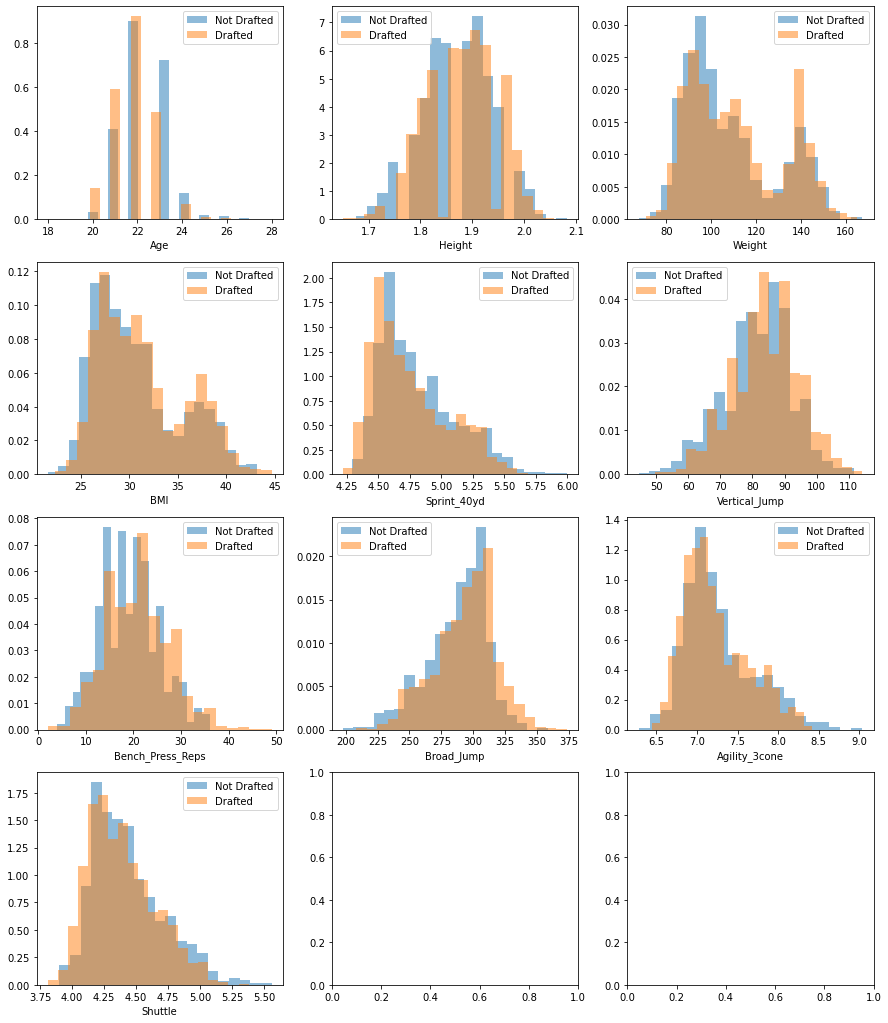

In [16]:
# Histograms of numerical data
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,18))

cols = ['Age','Height','Weight','BMI','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone','Shuttle']

for i, col in enumerate(cols):
    r = i//3
    c = i%3
    
    ax[r,c].hist(df_combine[df_combine['Drafted']==0][col],bins=20,alpha=0.5,density=True,label='Not Drafted')
    ax[r,c].hist(df_combine[df_combine['Drafted']==1][col],bins=20,alpha=0.5,density=True,label='Drafted')
    ax[r,c].set_xlabel(col)
    ax[r,c].legend()

The distributions above show some very subtle differences, but it can be hard to see. Part of the reason for this might be that all the different positions are being mixed together. It might be easier to see differences if we separate the players by position.

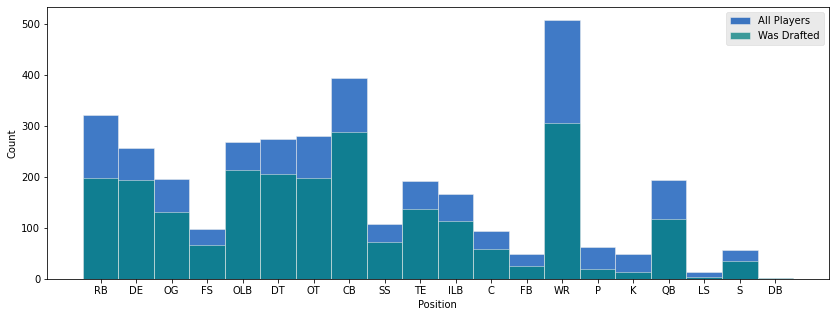

In [18]:
# Number of players at each position
fig, ax = plt.subplots(figsize=(14,5))
plt.style.use('ggplot')

sns.histplot(data=df_combine, x='Position', ax=ax, color=(0.0,0.3,0.7,1.0), label='All Players')
sns.histplot(data=df_combine[df_combine['Drafted']==1], x='Position', ax=ax, color=(0.0,0.5,0.5,0.5), label='Was Drafted')
ax.legend()

Below is a histogram of players by age. It appears that the youngest players (19 and 20 years old), get drafted at a very high rate.

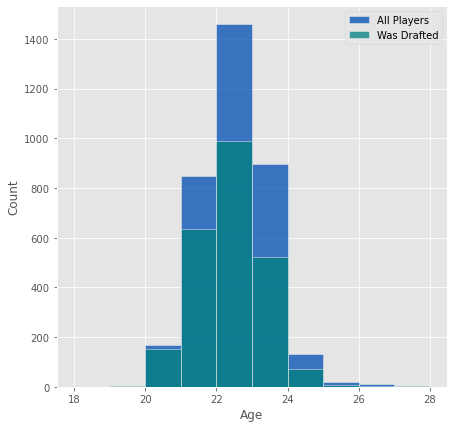

In [19]:
fig, ax = plt.subplots(figsize=(7,7))

sns.histplot(data=df_combine, x='Age', ax=ax, color=(0.0,0.3,0.7,1.0), binwidth=1, label='All Players')
sns.histplot(data=df_combine[df_combine['Drafted']==1], x='Age', ax=ax, color=(0.0,0.5,0.5,0.5), binwidth=1, label='Was Drafted')
ax.legend()

In [20]:
# Look at those with DB as the position
df_combine[df_combine['Position']=='DB']

Year              Player   Age    School  Height     Weight  \
2054  2018  Minkah Fitzpatrick  21.0   Alabama  1.8542  91.172066   
3279  2018       Quenton Meeks  21.0  Stanford  1.8796  92.986436   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  ...  \
2054         4.46          83.82              14.0      307.34  ...   
3279          NaN          99.06              11.0      325.12  ...   

            BMI  Player_Type   Position_Type  Position Drafted player_code  \
2054  26.518481      defense  defensive_back        DB       1    FitzMi00   
3279  26.320172      defense  defensive_back        DB       0    MeekQu00   

     pro_bowls  pro_bowlYN Missing_Athletic_Tests  school_group  
2054         3           1                      2             1  
3279         0           0                      1             1  

[2 rows x 23 columns]

There are only two players with positions listed as DB (defensive back). This is a more general term that encompasses safeties, free safeties, strong safeties, and cornerbacks. After looking these players up online, Minkah Fitzpatrick is considered to be a free safety and Quenton Meeks is considered to be a cornerback. Let's fix those below.

In [21]:
df_combine.at[2054,'Position'] = 'FS'
df_combine.at[3279,'Position'] = 'CB'

Below, I plot split violin plots for each numerical column separated by position. The violins are split so that the distribution of undrafted players is on the left and the distribution of drafted players is on the right. I also obtain the p-value for a Kolmogorov-Smirnov test to help determine which distributions are different.

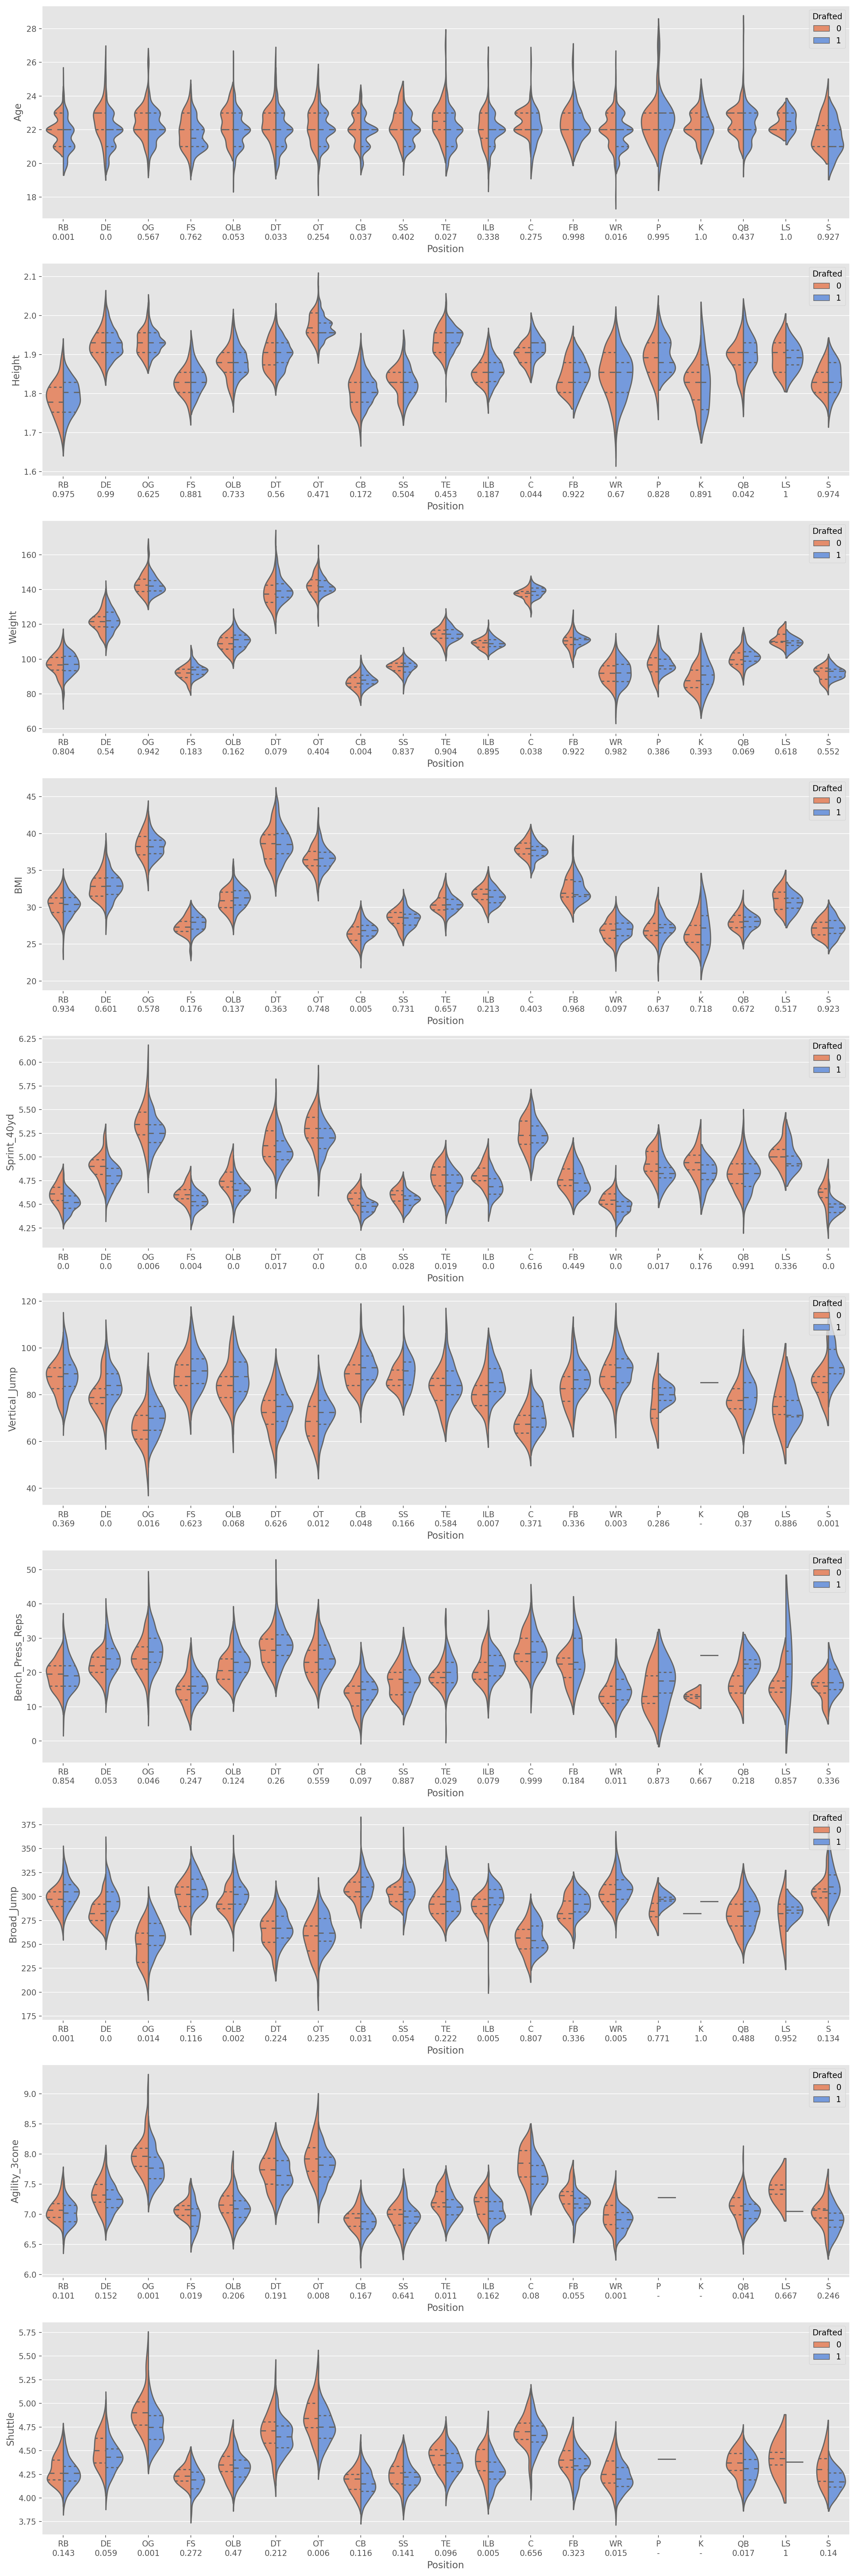

In [22]:
# Violin plots for each athletic test and each position
fig, ax = plt.subplots(nrows=10, figsize=(15,45), dpi=200)
plt.style.use('ggplot')

cols = ['Age','Height','Weight','BMI','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone','Shuttle']

for i, col in enumerate(cols):
    sns.violinplot(data=df_combine, x='Position', y=col, hue='Drafted', split=True, inner='quartile',
                   palette=['#f88458', '#6495ed'], ax=ax[i])
    ks_results = []
    for j, pos in enumerate(df_combine['Position'].unique()):
        try:
            ks_result = st.ks_2samp(df_combine[(df_combine['Drafted']==1) &
                                               (df_combine[col].isna()==False) &
                                               (df_combine['Position']==pos)][col],
                                    df_combine[(df_combine['Drafted']==0) &
                                               (df_combine[col].isna()==False) &
                                               (df_combine['Position']==pos)][col])
            ks_results.append(ks_result[1])
        except:
            ks_results.append("-")
    ax[i].set_xticklabels([f"{pos}\n{ks}" if ks=="-" else f"{pos}\n{round(ks,3)}" for pos, ks in zip(df_combine['Position'].unique(),ks_results)])
            
fig.tight_layout()

First, plotting the distributions for each position separately shows the drastic differences in performance on certain tests.
The classifiers will be much more accurate if the positions are taken into account.<br>

Second, there are visible differences between the drafted and undrafted players in many cases. For example, for positions where speed is considered important (wide receiver, running back, safety, cornerback), the drafted players ran the 40-yard sprint about a tenth of a second faster, a significant difference given the spread in the values is on the order of a tenth of a second.<br>

KS tests:<br>
Height: The only positions for which the KS-test p-value was below 0.05 were center (C) and quarterback (QB). In both cases, taller players were more likely to get drafted.<br>

Weight: Significant p-values are seen for cornerbacks (CB) and centers (C). In both cases, heavier players were more likely to get drafted.<br>

BMI: The only position with a significant p-value is cornerbacks (CB). Larger BMIs were more likely to be drafted.<br>

Sprint_40yd: Now we are talking. Most players do the 40-yard sprint, regardless of position. The only positions that do NOT have significant p-values from the KS-test centers (C), fullbacks (FB), kickers (K), quarterbacks (QB), and long snappers (LS). These are mostly not a surprise as most of these positions do not put great emphasis on speed (I guess the age of the running quarterback is over).

Vertical_Jump: Significant KS-test results: defensive ends (DE), offensive guards (OG), offensive tackle (OT), inside linebackers (ILB), wide receivers (WR), and safeties (S). In every case, players with larger vertical jumps had a better chance of being drafted.<br>

Bench_Press_Reps: Significant KS-test results: offensive guards (OG), tight ends (TE), and wide receivers (WR). More reps (stronger) means a better chance of being drafted.

Broad_Jump: Significant KS-test results: running backs (RB), defensive ends (DE), offensive guards (OG), outside linebackers (OLB), cornerbacks (CB), inside linebackers (ILB), and wide receivers (WR). Larger broad jumps lead to a better chance of being drafted.

Agility_3cone: Significant KS-test results: offensive guards (OG), free safeties (FS), offensive tackles (OT), tight ends (TE), wide receivers (WR), and quarterbacks (QB). Several other positions had low, but not significant p-values. Faster times lead to higher chances of being drafted.

Shuttle: Significant KS-test results: offensive guards (OG), offensive tackles (OT), inside linebackers (ILB), wide receivers (WR), and quarterbacks (QB). Faster shuttle times lead to higher chances of being drafted.

There weren't any columns that led to a significant p-value for kickers, punters, or long snappers. This is not particularly surprising; those positions have a very specific set of skills needed that are not really tested by the drills at the combine. Fullbacks also didn't have any p-values below 0.05. This is probably just because of small sample sizes (who still uses fullbacks?)

The plots and KS tests indicate that the results of the combine are going to have predictive power when trying to tell who will get drafted.

Below are more violin plots, but with the players separated by whether or not they ever made a Pro Bowl.

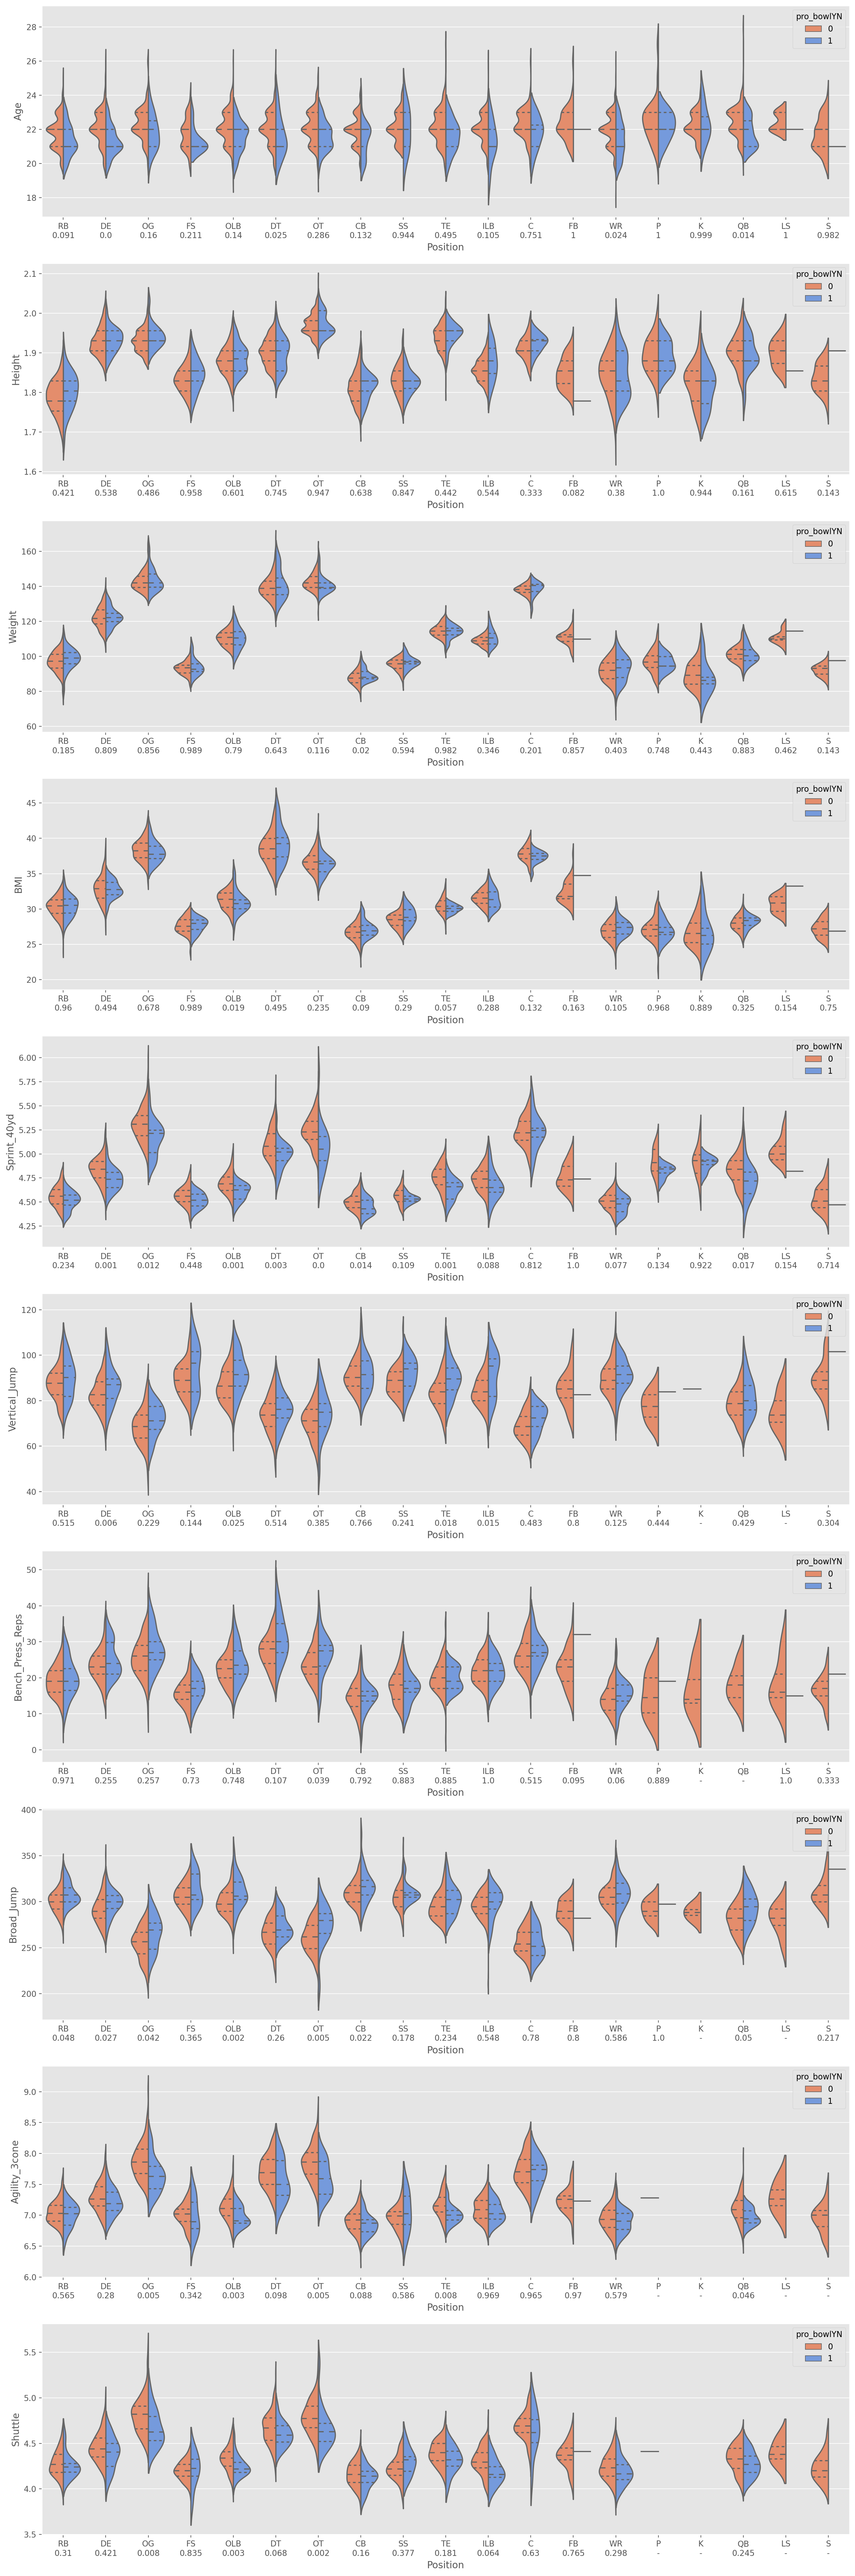

In [23]:
# Violin plots for each athletic test and each position
fig, ax = plt.subplots(nrows=10, figsize=(15,45), dpi=200)
plt.style.use('ggplot')

cols = ['Age','Height','Weight','BMI','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone','Shuttle']

for i, col in enumerate(cols):
    sns.violinplot(data=df_combine, x='Position', y=col, hue='pro_bowlYN', split=True, inner='quartile',
                   palette=['#f88458', '#6495ed'], ax=ax[i])
    ks_results = []
    for j, pos in enumerate(df_combine['Position'].unique()):
        try:
            ks_result = st.ks_2samp(df_combine[(df_combine['pro_bowlYN']==1) &
                                               (df_combine[col].isna()==False) &
                                               (df_combine['Position']==pos)][col],
                                    df_combine[(df_combine['pro_bowlYN']==0) &
                                               (df_combine[col].isna()==False) &
                                               (df_combine['Position']==pos)][col])
            ks_results.append(ks_result[1])
        except:
            ks_results.append("-")
    ax[i].set_xticklabels([f"{pos}\n{ks}" if ks=="-" else f"{pos}\n{round(ks,3)}" for pos, ks in zip(df_combine['Position'].unique(),ks_results)])
            
fig.tight_layout()

Similar to the previous violin plots, it looks like certain drills have some ability to predict whether somoene will make a Pro Bowl, but it also depends on the position they play.

There were not enough players at fullback, punter, kicker, or safety who have made a Pro Bowl to calculate anything.

In [1331]:
cut_start = 4.0
cut_end = 5.5

best_acc = 0.0
best_cut = cut_start
best_cf = [0.0,0.0,0.0,0.0]

pos = 'ILB'
col = 'Sprint_40yd'

cut = cut_start
while cut <= cut_end:
    TN = sum(df_combine[(df_combine['Position']==pos) & (df_combine['Drafted']==0)][col]>cut)
    FP = sum(df_combine[(df_combine['Position']==pos) & (df_combine['Drafted']==0)][col]<=cut)
    FN = sum(df_combine[(df_combine['Position']==pos) & (df_combine['Drafted']==1)][col]>cut)
    TP = sum(df_combine[(df_combine['Position']==pos) & (df_combine['Drafted']==1)][col]<=cut)
    
    acc = (TP+TN)/(TP+FP+TN+FN)
    
    if acc > best_acc:
        best_acc = acc
        best_cf = [TN,FP,FN,TP]
        best_cut = cut
    
    cut += 0.01

print(f"{col}: {best_cut}")
print()
print(f"{best_cf[0]} \t {best_cf[1]} \t {round(best_cf[0]/(best_cf[0]+best_cf[1]),3)}")
print(f"{best_cf[2]} \t {best_cf[3]} \t {round(best_cf[3]/(best_cf[2]+best_cf[3]),3)}")
print(f"{round(best_cf[0]/(best_cf[0]+best_cf[2]),3)} \t {round(best_cf[3]/(best_cf[3]+best_cf[1]),3)}")
print()
print(f"Accuracy: {round(best_acc,3)}")

Sprint_40yd: 4.839999999999982

19 	 29 	 0.396
12 	 92 	 0.885
0.613 	 0.76

Accuracy: 0.73


WR, Sprint_40yd: 4.55, Acc=0.678
WR, Vertical_Jump: 82.6, Acc=0.64

### Missing Values

For certain classifiers, it is important to fill missing values. As discussed before, it would not make much sense to just take the mean or median of a given column since different football positions have such different peformance on the drills. Instead, I should impute using just players of the same position.<br>

Below, I wrote a function for imputing missing values for each separate position. The function is also able to standardize the data, again treating each position separately. Some classifiers need different columns to have similar scales while others do not, hence why I made standardizing optional.

I wrote a function to do this because I eventually want to use GridSearchCV to tune hyperparameters and I need a pipeline that will process and fit the data so there is no data leakage. I do not actually think the data leakage would be significant here; the leakage would be caused by taking means of both training and validation data together when imputing rather than separately, but these means should be very close anyway. It is just good practice to write a custom function for my pipeline.

In [37]:
def ImputeAndScaleByPosition(X, standardize=True):
    """
    This function is a custom imputer and standard scaler that handles each
    football position separately.
    
    Input: 
    X: pandas DataFrame
    It can't just be a numpy array because the column names are needed.
    
    standardize: True if data should be transformed to standard scale (default).
    
    Output: pandas DataFrame of transformed data.
    Even columns that were not transformed are passed through the function.
    """
    # Columns where position IS NOT taken into account
    cols1 = ['Age']
    
    # Columns where position IS taken into account
    cols2 = ['Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI']

    Xcopy = X.copy()

    for col in cols1:
        Xcopy.loc[Xcopy[col].isna()==True,col] = X.loc[X[col].isna()==False,col].mean()
        
        if standardize:
            Xcopy[col] -= X.loc[X[col].isna()==False,col].mean()
            Xcopy[col] /= X.loc[X[col].isna()==False,col].std()

    for col in cols2:
        for pos in Xcopy['Position'].unique():
            if sum((X[col].isna()==False) & (X['Position']==pos)) > 2:
                # Impute mean
                Xcopy.loc[(Xcopy[col].isna()==True) & (Xcopy['Position']==pos),col] = \
                X.loc[(X[col].isna()==False) & (X['Position']==pos),col].mean()
                
                if standardize:
                    # Subtract mean
                    Xcopy.loc[Xcopy['Position']==pos,col] -= X.loc[(X[col].isna()==False) & (X['Position']==pos),col].mean()
                    # Divide by standard deviation
                    Xcopy.loc[Xcopy['Position']==pos,col] /= X.loc[(X[col].isna()==False) & (X['Position']==pos),col].std()
                    
            # Depending on the split, there might not have been any data to make a mean or std from.
            # Just use whole dataset in this case.
            else:
                # Impute mean
                Xcopy.loc[(Xcopy[col].isna()==True) & (Xcopy['Position']==pos),col] = \
                X.loc[X[col].isna()==False,col].mean()
                
                if standardize:
                    # Subtract mean
                    Xcopy.loc[Xcopy['Position']==pos,col] -= X.loc[X[col].isna()==False,col].mean()
                    # Divide by standard deviation
                    Xcopy.loc[Xcopy['Position']==pos,col] /= X.loc[X[col].isna()==False,col].std()

    return Xcopy

In [25]:
# Try out function
df_fill = ImputeAndScaleByPosition(df_combine)
df_fill

Year            Player       Age        School    Height    Weight  \
0     2009      Beanie Wells -2.057429      Ohio St.  1.462241  1.589628   
1     2009        Will Davis -0.022988      Illinois -1.372217 -0.604464   
2     2009    Herman Johnson  2.011453           LSU  2.519135  4.064537   
3     2009    Rashad Johnson  0.994232       Alabama -0.891864 -0.275926   
4     2009        Cody Brown -0.022988   Connecticut -0.045714  0.047665   
...    ...               ...       ...           ...       ...       ...   
3570  2019       Jalen Jelks -0.022988        Oregon  1.037763 -0.969300   
3571  2019     Chris Slayton -0.022988      Syracuse  0.782574 -0.046170   
3572  2019   Javon Patterson -1.040208   Mississippi -0.299587  0.361851   
3573  2019      Dakota Allen  0.994232    Texas Tech -0.675117 -1.299107   
3574  2019  Jordan Brailford  0.994232  Oklahoma St.  0.632307  0.796283   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  ...       BMI  \
0       -1.585033      -0.349712          1.239326    1.722030  ...  0.468497   
1        0.127388       0.065980          0.722462   -0.026856  ...  0.356474   
2        1.148935       0.000000         -0.902263    0.000000  ...  1.708333   
3       -0.720185       0.509781         -0.233639   -0.128689  ...  0.555367   
4        0.661650       0.663643          0.721503    0.261771  ...  0.077352   
...           ...            ...               ...         ...  ...       ...   
3570     0.709398      -0.100910         -0.999512   -0.341665  ... -1.545169   
3571     0.221823      -0.060600          0.031218   -0.616411  ... -0.543716   
3572    -0.676696       0.071673          0.125524   -0.545525  ...  0.581735   
3573     0.269931      -0.647072          0.267538   -0.040001  ... -0.383308   
3574    -0.288813       0.976791         -0.152282    1.252136  ...  0.198688   

      Player_Type      Position_Type  Position Drafted player_code pro_bowls  \
0         offense    backs_receivers        RB       1    WellCh00         0   
1         defense  defensive_lineman        DE       1    DaviWi99         0   
2         offense  offensive_lineman        OG       1    JohnHe23         0   
3         defense     defensive_back        FS       1    JohnRa98         0   
4         defense        line_backer       OLB       1    BrowCo96         0   
...           ...                ...       ...     ...         ...       ...   
3570      defense  defensive_lineman        DE       1    JelkJa00         0   
3571      defense  defensive_lineman        DT       1    SlayCh00         0   
3572      offense  offensive_lineman         C       1    PattJa00         0   
3573      defense        line_backer       ILB       1    AlleDa01         0   
3574      defense        line_backer       OLB       1    BraiJo00         0   

      pro_bowlYN Missing_Athletic_Tests  school_group  
0              0                      2             1  
1              0                      0             2  
2              0                      4             1  
3              0                      0             1  
4              0                      0             2  
...          ...                    ...           ...  
3570           0                      0             1  
3571           0                      1             3  
3572           0                      0             2  
3573           0                      0             3  
3574           0                      2             2  

[3575 rows x 23 columns]

After running the function, any player that did not complete a test at the Combine should now have a 0.0 in its place (to indicate a z-score of 0) if standardize was left as True. If standardize was set to False, then each missing test should be equal to the mean for all of the players of the same position.

In [26]:
df_fill.describe()

Year           Age        Height        Weight   Sprint_40yd  \
count  3575.000000  3.575000e+03  3.575000e+03  3.575000e+03  3.575000e+03   
mean   2013.960000 -1.152769e-15  2.655343e-15  9.142648e-17 -3.498057e-16   
std       3.140671  9.950915e-01  9.974786e-01  9.974786e-01  9.697437e-01   
min    2009.000000 -4.091869e+00 -4.157774e+00 -3.723110e+00 -3.000917e+00   
25%    2011.000000 -1.040208e+00 -7.237355e-01 -6.419418e-01 -6.344356e-01   
50%    2014.000000 -2.298803e-02 -4.571430e-02 -4.591219e-02  0.000000e+00   
75%    2017.000000  9.942323e-01  6.323069e-01  6.333577e-01  5.790072e-01   
max    2019.000000  6.080334e+00  3.854023e+00  4.064537e+00  3.866967e+00   

       Vertical_Jump  Bench_Press_Reps   Broad_Jump  Agility_3cone  \
count    3575.000000      3.575000e+03  3575.000000    3575.000000   
mean        0.000044      7.950129e-17    -0.000079       0.000028   
std         0.891894      8.575025e-01     0.887043       0.803255   
min        -3.043801     -3.960804e+00    -5.788542      -3.287061   
25%        -0.512833     -4.559059e-01    -0.494076      -0.318381   
50%         0.000000      0.000000e+00     0.000000       0.000000   
75%         0.465892      3.547359e-01     0.426831       0.249463   
max         3.600756      3.982884e+00     4.488612       3.965404   

           Shuttle           BMI      Drafted    pro_bowls   pro_bowlYN  \
count  3575.000000  3.575000e+03  3575.000000  3575.000000  3575.000000   
mean      0.000006 -1.264070e-15     0.669930     0.236643     0.093706   
std       0.817410  9.974786e-01     0.470304     0.940567     0.291460   
min      -3.233715 -4.171374e+00     0.000000     0.000000     0.000000   
25%      -0.343216 -6.653248e-01     0.000000     0.000000     0.000000   
50%       0.000000 -1.229496e-02     1.000000     0.000000     0.000000   
75%       0.297904  6.394503e-01     1.000000     0.000000     0.000000   
max       3.660721  3.611127e+00     1.000000    10.000000     1.000000   

       Missing_Athletic_Tests  school_group  
count             3575.000000   3575.000000  
mean                 1.398322      1.916643  
std                  1.810310      0.828149  
min                  0.000000      1.000000  
25%                  0.000000      1.000000  
50%                  1.000000      2.000000  
75%                  2.000000      3.000000  
max                  6.000000      3.000000

Below, we can see that out of 48 kickers, none did the Agility_3cone or Shuttle drills, and 3 or fewer did Vertical_Jump, Bench_Press_Reps, and Broad_Jump. A similar story is seen with punters. I am going to cut both from the dataset because both positions put great emphasis on a specific skill (kicking) and that skill is not captured in the Combine.

I am going to cut long snappers from the dataset because there are so few of them.

There will still be 3451 players in the dataset.

In [27]:
df_combine[df_combine['Position']=='K'].describe()

Year        Age     Height      Weight  Sprint_40yd  \
count    48.00000  47.000000  48.000000   48.000000    35.000000   
mean   2013.87500  22.234043   1.822979   88.979703     4.910000   
std       3.07789   0.757937   0.051933    7.379699     0.146348   
min    2009.00000  21.000000   1.727200   74.389149     4.570000   
25%    2011.00000  22.000000   1.778000   83.914588     4.805000   
50%    2014.00000  22.000000   1.828800   87.770124     4.930000   
75%    2016.00000  23.000000   1.854200   94.460611     4.960000   
max    2019.00000  24.000000   1.955800  107.047799     5.250000   

       Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  Shuttle  \
count           1.00               3.0    2.000000            0.0      0.0   
mean           85.09              17.0  288.290000            NaN      NaN   
std              NaN               7.0    8.980256            NaN      NaN   
min            85.09              12.0  281.940000            NaN      NaN   
25%            85.09              13.0  285.115000            NaN      NaN   
50%            85.09              14.0  288.290000            NaN      NaN   
75%            85.09              19.5  291.465000            NaN      NaN   
max            85.09              25.0  294.640000            NaN      NaN   

             BMI    Drafted  pro_bowls  pro_bowlYN  Missing_Athletic_Tests  \
count  48.000000  48.000000  48.000000   48.000000               48.000000   
mean   26.782084   0.291667   0.125000    0.125000                5.145833   
std     2.049076   0.459340   0.334219    0.334219                0.618495   
min    23.352095   0.000000   0.000000    0.000000                3.000000   
25%    25.219195   0.000000   0.000000    0.000000                5.000000   
50%    26.355920   0.000000   0.000000    0.000000                5.000000   
75%    27.896846   1.000000   0.000000    0.000000                5.250000   
max    31.464534   1.000000   1.000000    1.000000                6.000000   

       school_group  
count     48.000000  
mean       1.770833  
std        0.805291  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        2.000000  
max        3.000000

In [28]:
# Cut kickers, punters, and long snappers
df_combine.drop(df_combine[df_combine['Position'].isin(['K','P','LS'])].index, inplace=True)
df_combine

Year            Player   Age        School    Height      Weight  \
0     2009      Beanie Wells  20.0      Ohio St.  1.854200  106.594207   
1     2009        Will Davis  22.0      Illinois  1.879600  118.387609   
2     2009    Herman Johnson  24.0           LSU  2.006600  165.107623   
3     2009    Rashad Johnson  23.0       Alabama  1.803400   92.079251   
4     2009        Cody Brown  22.0   Connecticut  1.879600  110.676538   
...    ...               ...   ...           ...       ...         ...   
3570  2019       Jalen Jelks  22.0        Oregon  1.965325  116.119647   
3571  2019     Chris Slayton  22.0      Syracuse  1.930400  139.252858   
3572  2019   Javon Patterson  21.0   Mississippi  1.905000  139.252858   
3573  2019      Dakota Allen  23.0    Texas Tech  1.838325  105.233430   
3574  2019  Jordan Brailford  23.0  Oklahoma St.  1.905000  114.305277   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  ...  \
0            4.38          85.09              25.0      325.12  ...   
1            4.84          83.82              27.0      292.10  ...   
2            5.50            NaN              21.0         NaN  ...   
3            4.49          93.98              15.0      304.80  ...   
4            4.76          92.71              26.0      304.80  ...   
...           ...            ...               ...         ...  ...   
3570         4.92          82.55              19.0      287.02  ...   
3571         5.13          73.66              28.0      256.54  ...   
3572         5.13          69.85              27.0      248.92  ...   
3573         4.77          80.01              23.0      294.64  ...   
3574         4.65          95.25              22.0      320.04  ...   

            BMI  Player_Type      Position_Type  Position Drafted player_code  \
0     31.004194      offense    backs_receivers        RB       1    WellCh00   
1     33.510073      defense  defensive_lineman        DE       1    DaviWi99   
2     41.005821      offense  offensive_lineman        OG       1    JohnHe23   
3     28.312463      defense     defensive_back        FS       1    JohnRa98   
4     31.327425      defense        line_backer       OLB       1    BrowCo96   
...         ...          ...                ...       ...     ...         ...   
3570  30.063321      defense  defensive_lineman        DE       1    JelkJa00   
3571  37.368830      defense  defensive_lineman        DT       1    SlayCh00   
3572  38.371975      offense  offensive_lineman         C       1    PattJa00   
3573  31.139321      defense        line_backer       ILB       1    AlleDa01   
3574  31.497517      defense        line_backer       OLB       1    BraiJo00   

     pro_bowls  pro_bowlYN Missing_Athletic_Tests  school_group  
0            0           0                      2             1  
1            0           0                      0             2  
2            0           0                      4             1  
3            0           0                      0             1  
4            0           0                      0             2  
...        ...         ...                    ...           ...  
3570         0           0                      0             1  
3571         0           0                      1             3  
3572         0           0                      0             2  
3573         0           0                      0             3  
3574         0           0                      2             2  

[3451 rows x 23 columns]

# Classification Models

Below, I iteratively create models using each of the following types of classifiers:<br>
1. Logistic Regression
2. Decision Tree
3. K Nearest Neighbors
4. Naive Bayes
5. Random Forest
6. XGBoost

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

## Logistic Regression

A logistic regression model cannot handle missing values, therefore, I will use the ImputeAndScaleByPosition function that I wrote to fill missing values. Technically, a logistic regression model does not require rescaling (if all the values in a column doubled, then you could compensate for that by halving the corresponding coefficient). However, if the logistic regression uses regularization to punish large parameter values, then scaling values to a common scale becomes important. Therefore, I also rescale the numerical values.

**Model 1: Baseline Logistic Regression**<br>

Below, I fit a logistic regression model WITHOUT treating the positions separately when imputing and scaling.<br>
The model still takes into account position by one-hot-encoding the positions.

In [35]:
# Define X and y
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

# Apply imputer and scaler
X_train = ImputeAndScaleByPosition(X_train)
X_test = ImputeAndScaleByPosition(X_test)

# Apply get_dummies to separate categorical data into columns
X_train = pd.get_dummies(X_train, columns=['Position','school_group'])
X_test = pd.get_dummies(X_test, columns=['Position','school_group'])

Training:
              precision    recall  f1-score   support

           0       0.62      0.31      0.41       808
           1       0.74      0.91      0.82      1780

    accuracy                           0.72      2588
   macro avg       0.68      0.61      0.61      2588
weighted avg       0.70      0.72      0.69      2588

Test:
              precision    recall  f1-score   support

           0       0.68      0.32      0.43       285
           1       0.73      0.93      0.82       578

    accuracy                           0.73       863
   macro avg       0.71      0.62      0.63       863
weighted avg       0.72      0.73      0.69       863



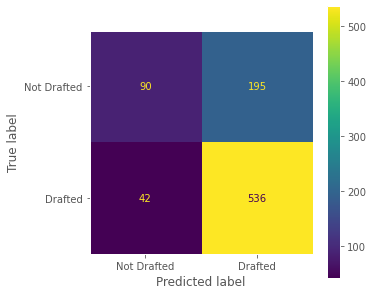

In [36]:
# Instantiate LogisticRegressionModel
logreg = LogisticRegression(C=1e12, random_state=42, solver='lbfgs')

# Fit model
logreg.fit(X_train, y_train)

# Get predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print('Training:')
print(classification_report(y_train, y_train_pred))
print('Test:')
print(classification_report(y_test, y_test_pred))

cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

First, the model does not appear to be overfitting since the test data had a very similar accuracy as the training data.<br>

The model is good at identifying players who will be drafted (93% recall), but struggles with players who will not be drafted (32% recall). 

**Model 2: Impute and Scale Each Position Separately**

Next, I run the same model, but with imputing and scaling done separately for each column taking into account position.<br>
The code looks identical because the change is made within the actual function.<br>
Note: The Age column still does not take into account position.

In [32]:
# Define X and y
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

# Apply imputer and scaler
X_train = ImputeAndScaleByPosition(X_train)
X_test = ImputeAndScaleByPosition(X_test)

# Apply get_dummies to separate categorical data into columns
X_train = pd.get_dummies(X_train, columns=['Position','school_group'])
X_test = pd.get_dummies(X_test, columns=['Position','school_group'])

Training:
              precision    recall  f1-score   support

           0       0.63      0.37      0.47       808
           1       0.76      0.90      0.82      1780

    accuracy                           0.73      2588
   macro avg       0.69      0.64      0.64      2588
weighted avg       0.72      0.73      0.71      2588

Test:
              precision    recall  f1-score   support

           0       0.71      0.33      0.45       285
           1       0.74      0.93      0.83       578

    accuracy                           0.74       863
   macro avg       0.73      0.63      0.64       863
weighted avg       0.73      0.74      0.70       863



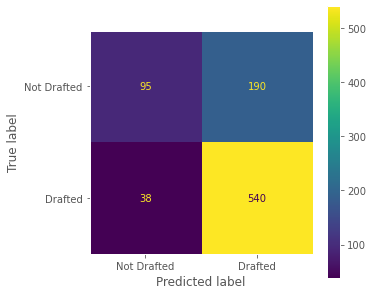

In [33]:
# Instantiate LogisticRegressionModel
logreg = LogisticRegression(C=1e12, random_state=42, solver='lbfgs')

# Fit model
logreg.fit(X_train, y_train)

# Get predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print('Training:')
print(classification_report(y_train, y_train_pred))
print('Test:')
print(classification_report(y_test, y_test_pred))

cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

In [1804]:
df_test = df_combine.loc[y_test.index]
df_test['predict'] = y_test_pred
df_test['correct'] = 1*(df_test['Drafted']==df_test['predict'])
df_test

Year           Player   Age         School  Height      Weight  \
710   2012   Ronnie Hillman  20.0  San Diego St.  1.7526   90.718474   
1482  2015  DeAndre Smelter  23.0   Georgia Tech  1.8796  102.511876   
1190  2014    Greg Robinson  21.0         Auburn  1.9558  150.592667   
3039  2016    Duke Williams  22.0         Auburn  1.8796  103.872653   
430   2011    Ryan Williams  20.0  Virginia Tech  1.7526   96.161582   
...    ...              ...   ...            ...     ...         ...   
2927  2015    Julian Wilson  23.0       Oklahoma  1.8796   92.986436   
3138  2016    Johnny Holton  25.0     Cincinnati  1.8542   86.182550   
1331  2015   Cedric Ogbuehi  22.0      Texas A&M  1.9558  138.799265   
799   2012   Brandon Mosley  23.0         Auburn  1.9812  142.428004   
3261  2018      Jojo Wicker  21.0    Arizona St.  1.9050  134.263341   

      Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  ...  \
710          4.42          93.98              17.0         NaN  ...   
1482         4.52            NaN               NaN         NaN  ...   
1190         4.92          72.39              32.0      287.02  ...   
3039         4.72          76.20              14.0      307.34  ...   
430          4.59         101.60              19.0      312.42  ...   
...           ...            ...               ...         ...  ...   
2927         4.58          91.44               NaN      317.50  ...   
3138         4.54          80.01               8.0      312.42  ...   
1331         4.98            NaN              23.0         NaN  ...   
799          5.14          68.58              30.0      261.62  ...   
3261         5.16          76.20              25.0      266.70  ...   

          Position_Type  Position Drafted  player_code pro_bowls pro_bowlYN  \
710     backs_receivers        RB       1     HillRo00         0          0   
1482    backs_receivers        WR       1     SmelDe00         0          0   
1190  offensive_lineman        OT       1     RobiGr01         0          0   
3039    backs_receivers        WR       0     WillDh00         0          0   
430     backs_receivers        RB       1     WillRy00         0          0   
...                 ...       ...     ...          ...       ...        ...   
2927     defensive_back        CB       0     WilsJu00         0          0   
3138    backs_receivers        WR       0         None         0          0   
1331  offensive_lineman        OT       1     OgbuCe00         0          0   
799   offensive_lineman        OT       1     MoslBr00         0          0   
3261  defensive_lineman        DE       0     WickJo00         0          0   

     Missing_Athletic_Tests  school_group predict  correct  
710                       3             2       1        1  
1482                      5             3       1        1  
1190                      0             1       1        1  
3039                      0             1       0        1  
430                       0             2       1        1  
...                     ...           ...     ...      ...  
2927                      1             1       1        0  
3138                      2             3       0        1  
1331                      4             1       1        1  
799                       0             1       1        1  
3261                      2             2       1        0  

[863 rows x 25 columns]

In [1850]:
df_test[df_test['Position']=='DE'].describe()

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Year        Age     Height      Weight  Sprint_40yd  \
count    65.000000  65.000000  65.000000   65.000000    63.000000   
mean   2013.769231  22.076923   1.930449  121.862824     4.836508   
std       2.816077   1.202961   0.035923    6.675227     0.138578   
min    2009.000000  20.000000   1.879600  109.769353     4.530000   
25%    2011.000000  21.000000   1.905000  117.480424     4.750000   
50%    2014.000000  22.000000   1.930400  120.655570     4.840000   
75%    2016.000000  23.000000   1.955800  126.098679     4.920000   
max    2019.000000  26.000000   2.032000  140.613635     5.230000   

       Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone    Shuttle  \
count      52.000000         49.000000   53.000000      46.000000  47.000000   
mean       82.403462         23.857143  288.889057       7.232826   4.425532   
std         7.058320          4.546061   15.298105       0.207425   0.156883   
min        71.120000         14.000000  259.080000       6.780000   4.130000   
25%        77.470000         21.000000  279.400000       7.075000   4.320000   
50%        82.550000         24.000000  287.020000       7.240000   4.410000   
75%        86.360000         26.000000  299.720000       7.367500   4.495000   
max        99.060000         36.000000  325.120000       7.570000   4.880000   

             BMI    Drafted  pro_bowls  pro_bowlYN  Missing_Athletic_Tests  \
count  65.000000  65.000000  65.000000   65.000000               65.000000   
mean   32.709977   0.738462   0.276923    0.123077                1.230769   
std     1.780967   0.442893   0.800541    0.331082                1.902048   
min    29.645369   0.000000   0.000000    0.000000                0.000000   
25%    31.526146   0.000000   0.000000    0.000000                0.000000   
50%    32.472477   1.000000   0.000000    0.000000                0.000000   
75%    33.510073   1.000000   0.000000    0.000000                2.000000   
max    38.746946   1.000000   3.000000    1.000000                6.000000   

       school_group    predict    correct  
count     65.000000  65.000000  65.000000  
mean       1.892308   0.923077   0.753846  
std        0.792998   0.268543   0.434122  
min        1.000000   0.000000   0.000000  
25%        1.000000   1.000000   1.000000  
50%        2.000000   1.000000   1.000000  
75%        3.000000   1.000000   1.000000  
max        3.000000   1.000000   1.000000

The fit got slightly better as both the training and test data achieved 1% higher accuracy. The overall performance is not that much better, though.

**Model 3: Interaction Terms**
The two previous models handled position by creating one-hot-encoded columns, one for each position. These are useful if certain positions are drafted more often than others. However, this does not allow the model to determine which columns matter more for which position. For example, this does not allow the model to emphasize the 40-yard sprint for running backs while emphasizing the number of bench press reps for offensive guards.

I address this in this model by creating interaction terms between position and numerical values. Now instead of having one column per drill and one column for each position, there will be columns like "Sprint_40ydxPosition_RB" and "Bench_Press_RepsxPosition_OG". The upside is that the model can now determine what matters to each position separately. The downside is that it creates lots of columns (the model ends up using 175 columns), so there is a higher risk of overfitting.

In [1778]:
# Define X and y
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

# Apply imputer and scaler
X_train = ImputeAndScaleByPosition(X_train)
X_test = ImputeAndScaleByPosition(X_test)

# Apply get_dummies to separate categorical data into columns
X_train = pd.get_dummies(X_train, columns=['school_group'])
X_test = pd.get_dummies(X_test, columns=['school_group'])

# Create interaction terms
list1 = ['Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI']
list2 = list(df_combine['Position'].unique())

len1 = len(list1)
len2 = len(list2)

n = 0
while n < len1*len2:
    i = n // len2
    j = n % len2
    X_train[f"{list1[i]}xPosition_{list2[j]}"] = X_train[list1[i]]*X_train['Position'].apply(lambda x: \
                                                                                             1 if x==list2[j] else 0)
    X_test[f"{list1[i]}xPosition_{list2[j]}"] = X_test[list1[i]]*X_test['Position'].apply(lambda x: \
                                                                                             1 if x==list2[j] else 0)

    n += 1
    
# Drop individual columns used to make the interaction terms
X_train.drop(columns=list1,inplace=True)
X_train.drop(columns='Position',inplace=True)
X_test.drop(columns=list1,inplace=True)
X_test.drop(columns='Position',inplace=True)

Training:
              precision    recall  f1-score   support

           0       0.67      0.42      0.52       808
           1       0.77      0.90      0.83      1780

    accuracy                           0.75      2588
   macro avg       0.72      0.66      0.67      2588
weighted avg       0.74      0.75      0.73      2588

Test:
              precision    recall  f1-score   support

           0       0.51      0.35      0.41       285
           1       0.72      0.83      0.77       578

    accuracy                           0.67       863
   macro avg       0.61      0.59      0.59       863
weighted avg       0.65      0.67      0.65       863



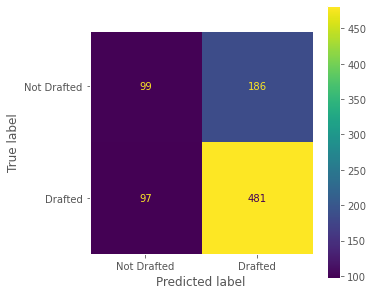

In [1780]:
# Instantiate LogisticRegressionModel
logreg = LogisticRegression(C=1e12, random_state=42, solver='lbfgs', max_iter=5000)

# Fit model
logreg.fit(X_train, y_train)

# Get predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print('Training:')
print(classification_report(y_train, y_train_pred))
print('Test:')
print(classification_report(y_test, y_test_pred))

cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

I knew that creating lots of interaction terms might lead to overfitting and it feels like that is what happened. The accuracy on the test data was 8 percentage points lower than the training accuracy (67% vs 75%). Also, the overall accuracy of this model is lower than the previous, simpler models.

**Model 4: Regularization**
One way to reduce overfitting is by using regularization. I have been using the lbfgs solver which uses Lasso regularization, but I have been using a very high C value so that there is essentially no regularization. Below, I will loop through some different values of C to see which works best.

This model still uses the interaction terms from model 3. If regularization does not improve the fit, then I will revert back to the model that does not use interaction terms (model 2).

In [1789]:
# Define X and y
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

# Apply imputer and scaler
X_train = ImputeAndScaleByPosition(X_train)
X_test = ImputeAndScaleByPosition(X_test)

# Apply get_dummies to separate categorical data into columns
X_train = pd.get_dummies(X_train, columns=['school_group'])
X_test = pd.get_dummies(X_test, columns=['school_group'])

# Create interaction terms
list1 = ['Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI']
list2 = list(df_combine['Position'].unique())

len1 = len(list1)
len2 = len(list2)

n = 0
while n < len1*len2:
    i = n // len2
    j = n % len2
    X_train[f"{list1[i]}xPosition_{list2[j]}"] = X_train[list1[i]]*X_train['Position'].apply(lambda x: \
                                                                                             1 if x==list2[j] else 0)
    X_test[f"{list1[i]}xPosition_{list2[j]}"] = X_test[list1[i]]*X_test['Position'].apply(lambda x: \
                                                                                             1 if x==list2[j] else 0)

    n += 1
    
# Drop individual columns used to make the interaction terms
X_train.drop(columns=list1,inplace=True)
X_train.drop(columns='Position',inplace=True)
X_test.drop(columns=list1,inplace=True)
X_test.drop(columns='Position',inplace=True)

1 0.709154113557358
10 0.709154113557358
100 0.6906141367323291
1000 0.6755504055619931
10000 0.6709154113557358
1000000.0 0.6709154113557358
10000000.0 0.6709154113557358
100000000.0 0.6709154113557358
1000000000.0 0.6720741599073001
10000000000.0 0.6720741599073001
Best C: 1
Training:
              precision    recall  f1-score   support

           0       0.66      0.40      0.50       808
           1       0.77      0.91      0.83      1780

    accuracy                           0.75      2588
   macro avg       0.72      0.65      0.66      2588
weighted avg       0.74      0.75      0.73      2588

Test:
              precision    recall  f1-score   support

           0       0.61      0.34      0.44       285
           1       0.73      0.89      0.80       578

    accuracy                           0.71       863
   macro avg       0.67      0.62      0.62       863
weighted avg       0.69      0.71      0.68       863



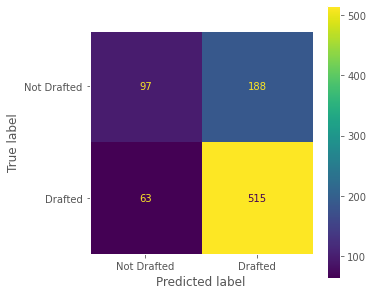

In [1791]:
C_vals = [1, 10, 100, 1000, 10000, 1e6, 1e7, 1e8, 1e9, 1e10]

best_C = 0
best_acc = 0.0

for C in C_vals:
    # Instantiate LogisticRegressionModel
    logreg = LogisticRegression(C=C, random_state=42, solver='lbfgs', max_iter=5000)

    # Fit model
    logreg.fit(X_train, y_train)

    # Get predictions
    y_train_pred = logreg.predict(X_train)
    y_test_pred = logreg.predict(X_test)
    
    acc = accuracy_score(y_test, y_test_pred)
    
    print(C, acc)
    
    if acc > best_acc:
        best_C = C
        best_acc = acc
        logreg_best = logreg

# Get predictions from best model
y_train_pred = logreg_best.predict(X_train)
y_test_pred = logreg_best.predict(X_test)
        
print(f"Best C: {best_C}")
print('Training:')
print(classification_report(y_train, y_train_pred))
print('Test:')
print(classification_report(y_test, y_test_pred))

cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

Based on the accuracy of the training data, the best C value was 1 (the most stringent regularization tested). The overfitting was reduced and the accuracy of the training data did improve, however, the result was still worse than the model without interaction terms.

**Model 5: Regularization and NO interaction terms**

The best performing model so far was model 2 which did not have interaction terms and did not employ strong regularization.
This model will loop through different values of C to see which achieves the highest accuracy in the training data.

In [1786]:
# Define X and y
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

# Apply imputer and scaler
X_train = ImputeAndScaleByPosition(X_train)
X_test = ImputeAndScaleByPosition(X_test)

# Apply get_dummies to separate categorical data into columns
X_train = pd.get_dummies(X_train, columns=['Position','school_group'])
X_test = pd.get_dummies(X_test, columns=['Position','school_group'])

1 0.7381228273464658
10 0.7358053302433372
100 0.7358053302433372
1000 0.7358053302433372
10000 0.7358053302433372
1000000.0 0.7358053302433372
10000000.0 0.7358053302433372
100000000.0 0.7358053302433372
1000000000.0 0.7358053302433372
10000000000.0 0.7358053302433372
Best C: 1
Training:
              precision    recall  f1-score   support

           0       0.63      0.37      0.46       808
           1       0.76      0.90      0.82      1780

    accuracy                           0.73      2588
   macro avg       0.69      0.63      0.64      2588
weighted avg       0.72      0.73      0.71      2588

Test:
              precision    recall  f1-score   support

           0       0.73      0.33      0.46       285
           1       0.74      0.94      0.83       578

    accuracy                           0.74       863
   macro avg       0.73      0.64      0.64       863
weighted avg       0.74      0.74      0.71       863



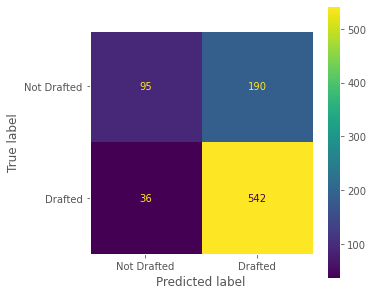

In [1788]:
C_vals = [1, 10, 100, 1000, 10000, 1e6, 1e7, 1e8, 1e9, 1e10]

best_C = 0
best_acc = 0.0

for C in C_vals:
    # Instantiate LogisticRegressionModel
    logreg = LogisticRegression(C=C, random_state=42, solver='lbfgs', max_iter=5000)

    # Fit model
    logreg.fit(X_train, y_train)

    # Get predictions
    y_train_pred = logreg.predict(X_train)
    y_test_pred = logreg.predict(X_test)
    
    acc = accuracy_score(y_test, y_test_pred)
    
    print(C, acc)
    
    if acc > best_acc:
        best_C = C
        best_acc = acc
        logreg_best = logreg

# Get predictions from best model
y_train_pred = logreg_best.predict(X_train)
y_test_pred = logreg_best.predict(X_test)
        
print(f"Best C: {best_C}")
print('Training:')
print(classification_report(y_train, y_train_pred))
print('Test:')
print(classification_report(y_test, y_test_pred))

cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

Technically, the best result was achieved with C=1, but the values barely changed at all as C increased. Regularization does not make a difference for the model.

**Logistic Regression Result**
The best model was model 2 which used no regularization, no interaction terms, but did impute and scale each position separately.

# Decision Tree Classifier

For the decision tree classifier, it is necessary to replace missing values. It is also important to rescale the data based on position.

One limitation of the decision tree classifier is that it might struggle to treat different positions separately. Hypothetically, it could start by splitting based on position, but since it is a greedy algorithm and each position gets drafted at a similar rate, it probably will not do that.

**Model 1: Default hyperparameters**

First, I will create a decision tree model using the default hyperparameters.

In [38]:
# Define X and y
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

# Apply imputer and scaler
X_train = ImputeAndScaleByPosition(X_train)
X_test = ImputeAndScaleByPosition(X_test)

# Apply get_dummies to separate categorical data into columns
X_train = pd.get_dummies(X_train, columns=['Position','school_group'])
X_test = pd.get_dummies(X_test, columns=['Position','school_group'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       1.00      1.00      1.00      1780

    accuracy                           1.00      2588
   macro avg       1.00      1.00      1.00      2588
weighted avg       1.00      1.00      1.00      2588

              precision    recall  f1-score   support

           0       0.40      0.35      0.37       285
           1       0.70      0.74      0.72       578

    accuracy                           0.61       863
   macro avg       0.55      0.54      0.55       863
weighted avg       0.60      0.61      0.60       863



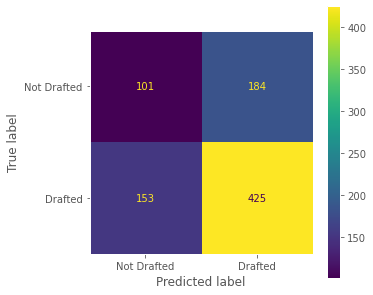

In [40]:
# Instantiate DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit model
dtc.fit(X_train, y_train)

# Get predictions
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

This model is severely overfitting. This is not surprising because the default parameters don't limit the tree from splitting as many times as it needs to in order to get a "perfect" fit. The model needs some hyperparameters to help keep it from overfitting.

**Model 2: Grid Search Cross Validation**
The second model makes the following changes compared to the first:<br>
1. The model will use some hyperparameters built in to the DecisionTreeClassifier class:<br>
criterion, max_depth, min_samples_leaf, and class_weight.<br>
2. GridSearchCV is used to both test out different values of these parameters, but do 3-way cross validation at the same time.
3. In order to avoid data leakage, I use a pipeline that performs all the preprocessing prior to each cross validation. This does make the process take quite a bit longer because every step of the process is done for every model.

In [44]:
# Decision tree pipeline with GridSearchCV
dtc = DecisionTreeClassifier()

param_grid_dtc = {
    'dtc__criterion': ['gini','entropy'],
    'dtc__max_depth': [3, 4, None],
    'dtc__min_samples_leaf': [1, 2, 3, 4],
    'dtc__class_weight': [None, {0: 2, 1: 1}, {0: 3, 1: 2}]
}

pipe = Pipeline(steps=[
    ('impute_scale',FunctionTransformer(ImputeAndScaleByPosition)),
    ('dummies',FunctionTransformer(pd.get_dummies,kw_args={'columns':['Position','school_group']})),
    ('dtc',dtc)
])

dtc_gridcv = GridSearchCV(pipe, param_grid=param_grid_dtc, cv=3)

X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

dtc_gridcv.fit(X_train, y_train)

best_parameters = dtc_gridcv.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

y_train_pred = dtc_gridcv.predict(X_train)
y_test_pred = dtc_gridcv.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

Grid Search found the following optimal parameters: 
dtc__class_weight: None
dtc__criterion: 'entropy'
dtc__max_depth: 3
dtc__min_samples_leaf: 1
              precision    recall  f1-score   support

           0       0.61      0.36      0.45       808
           1       0.75      0.90      0.82      1780

    accuracy                           0.73      2588
   macro avg       0.68      0.63      0.64      2588
weighted avg       0.71      0.73      0.71      2588

              precision    recall  f1-score   support

           0       0.54      0.28      0.37       285
           1       0.71      0.88      0.79       578

    accuracy                           0.68       863
   macro avg       0.62      0.58      0.58       863
weighted avg       0.66      0.68      0.65       863



The overfitting issue has been greatly alleviated, though not entirely eliminated.<br>

The overall accuracy on the test data was only 68%, not quite as good as the other types of models I have tried. It also struggles with recall of undrafted players, just like the other models.

# K Nearest Neighbors Classifier

# Naive Bayes Classifier

Scikit Learn does have a class for Naive Bayes models, but I decided to write my own from scratch for three reasons:<br>
1. It would be significantly easier getting the model to treat positions the way I want it to.
2. Technically, a Naive Bayes model shouldn't mind missing data, but online searches indicate that sklearn's Naive Bayes does.
3. It is good practice.

The "Naive" in Naive Bayes refers to the assumption that all of the independent columns are independent of one another. In reality, that tends to not actually be true and, realistically, it is not true in this case either. Players with faster 40-yard sprints tend to also have higher vertical jumps, but a lower number of bench press reps. However, the model should still be able to work reasonably well without taking into account these correlations.<br>

The one way in which I do not want the model to be naive is by assuming everything is independent of a player's position. I have written my classifier so that that the distributions depend on the position. This is part of the reason why I chose to write my own classifier since I wanted it to incorporate dependence on something other than the target variable.<br>

Below is the class that I wrote. It can actually be run without taking position into account (if you want) and you can specify which columns are categorical (those columns don't even need to be turned into numbers).<br>

This model does not require imputing or scaling of data. It is fine with missing values (it just likely won't perform as well on input that is missing data).

The predict method has one parameter called "bias". This bias indicates how much the model will lean towards predicting 1 rather than 0 (the model only works with binary classes as written). A bias of 1 means there is no bias, above 1 means it will predict 1 more often, and below 1 means it will predict 1 less often. It has an option called 'proportional' which automatically accounts for the class imbalance in the training data.

In [1792]:
class NaiveBayes:
    def __init__(self, split_by_position=None, categorical_cols=None):
        """
        Arguments:
        split_by_position: List of column names where the probabilities should be calculated
        for each position separately.
        
        categorical_thresh: Indicates which columns are categorical.
        """
        self.split_by_position = split_by_position
        self.categorical_cols = categorical_cols
        
    def fit(self, X, y):
        """
        Inputs:
        X: pandas dataframe of independent variables
        y: target variable
        """
        self.X = X
        self.y = y
        
    def predict(self, X, bias=1.0):
        """
        Input: 
        X: pandas DataFrame that matches the format of DataFrame used for fitting.
        bias: Number that indicates by how much to bias towards a positive prediction. Default is 1.0 (no bias).
        If bias is set to 'proportional', then the relative proportion of the target class is used
        """
        if bias == 'proportional': bias = sum(self.y==0)/sum(self.y==1)
        
        pred = []
        for i in X.index:
            logprob0 = np.log(sum(self.y==0)/len(self.y))
            logprob1 = np.log(sum(self.y==1)/len(self.y))
            
            for col in self.X.columns:
                
                if pd.isna(X.loc[i,col])==False:
                    
                    if col in self.categorical_cols:
                        
                        if col in self.split_by_position:
                            count0 = sum(self.y[(self.X[col]==X.loc[i,col]) & (self.X['Position']==X.loc[i,'Position'])]==0)
                            count1 = sum(self.y[(self.X[col]==X.loc[i,col]) & (self.X['Position']==X.loc[i,'Position'])]==1)
                            logprob0 += np.log(count0/(count0+count1))
                            logprob1 += np.log(count1/(count0+count1))
                            
                        else:
                            count0 = sum(self.y[self.X[col]==X.loc[i,col]]==0)
                            count1 = sum(self.y[self.X[col]==X.loc[i,col]]==1)
                            logprob0 += np.log(count0/(count0+count1))
                            logprob1 += np.log(count1/(count0+count1))
                        
                    else:
                    
                        if col in self.split_by_position:
                            mean0 = np.mean(self.X[(self.X['Position']==X.loc[i,'Position']) & (self.y==0)][col])
                            mean1 = np.mean(self.X[(self.X['Position']==X.loc[i,'Position']) & (self.y==1)][col])
                            std0 = np.std(self.X[(self.X['Position']==X.loc[i,'Position']) & (self.y==0)][col], ddof=1)
                            std1 = np.std(self.X[(self.X['Position']==X.loc[i,'Position']) & (self.y==1)][col], ddof=1)
                        
                        else:
                            mean0 = np.mean(self.X[self.y==0][col])
                            mean1 = np.mean(self.X[self.y==1][col])
                            std0 = np.std(self.X[self.y==0][col], ddof=1)
                            std1 = np.std(self.X[self.y==1][col], ddof=1)
                        
                        logprob0 += np.log(st.norm.pdf(X.loc[i,col], mean0, std0))
                        logprob1 += np.log(st.norm.pdf(X.loc[i,col], mean1, std1))
                        
            #print(np.exp(logprob0 - logprob1))
            if np.exp(logprob0 - logprob1) < bias:
                pred.append(1)
            else:
                pred.append(0)
                
        return pd.Series(pred, index=X.index)

**Model 1: Baseline Model with no bias**
The data fed to the Naive Bayes will not be imputed (missing values will remain missing) and it will not be rescaled (it does not need to be because it accounts for position).<br>

The baseline model will use the default bias (1, meaning no bias).

Train:
              precision    recall  f1-score   support

           0       0.77      0.22      0.35       808
           1       0.73      0.97      0.84      1780

    accuracy                           0.74      2588
   macro avg       0.75      0.60      0.59      2588
weighted avg       0.74      0.74      0.68      2588

Test:
              precision    recall  f1-score   support

           0       0.76      0.18      0.28       285
           1       0.71      0.97      0.82       578

    accuracy                           0.71       863
   macro avg       0.73      0.57      0.55       863
weighted avg       0.72      0.71      0.64       863



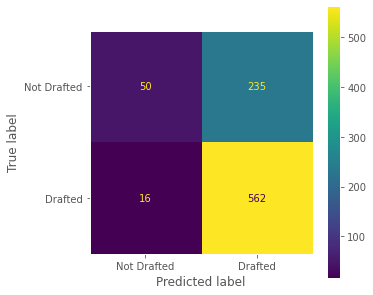

In [1795]:
# Define X and y
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

split_cols = ['Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI']
cat_cols = ['Position','school_group']

nb = NaiveBayes(split_by_position=split_cols, categorical_cols=cat_cols)

nb.fit(X_train, y_train)

# Bias is 1.0 by default
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

print('Train:')
print(classification_report(y_train, y_train_pred))
print('Test:')
print(classification_report(y_test, y_test_pred))

cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

The model tends to overpredict the number of players who will be drafted. It says that 92.4% will be drafted even though 67% of the test data players actually were. Because of this bias, it does a really poor job on the recall of undrafted players (just 18%). Let's see if using a different bias will help.

**Model 2: Proportional bias**

The second model will be the same as the first, except now it will use the option of making the bias proportional. Because about 1/3 of players did not get drafted, the bias will be around (1/3)/(2/3) = 1/2. This should fix the problem of the model predicting so many players getting drafted.

Train:
              precision    recall  f1-score   support

           0       0.69      0.34      0.45       808
           1       0.76      0.93      0.84      1780

    accuracy                           0.75      2588
   macro avg       0.72      0.63      0.64      2588
weighted avg       0.74      0.75      0.72      2588

Test:
              precision    recall  f1-score   support

           0       0.66      0.28      0.39       285
           1       0.72      0.93      0.81       578

    accuracy                           0.71       863
   macro avg       0.69      0.60      0.60       863
weighted avg       0.70      0.71      0.67       863



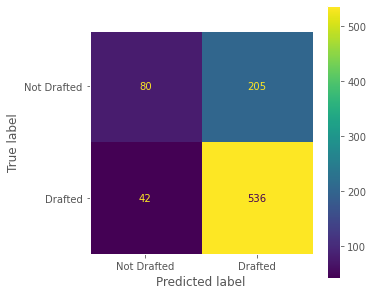

In [1794]:
# Define X and y
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

split_cols = ['Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI']
cat_cols = ['Position','school_group']

nb = NaiveBayes(split_by_position=split_cols, categorical_cols=cat_cols)

nb.fit(X_train, y_train)

# Using proportional bias
y_train_pred = nb.predict(X_train, bias='proportional')
y_test_pred = nb.predict(X_test, bias='proportional')

print('Train:')
print(classification_report(y_train, y_train_pred))
print('Test:')
print(classification_report(y_test, y_test_pred))

cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

The model still predicts that 85.9% of the players will be drafted, but that is less biased than the first model. As a result, the undrafted player recall improved from 18% to 28%. The drafted player recall remained high; it is still 93%. However, the overall accuracy did not improve as it is still 71%.

The performance was a little worse than the best logistic regression model. It has an accuracy of 71% and it only recalls 28% of undrafted players. The best logistic regression had 74% and 33%, respectively.

**Naive Bayes result**
I could continue tweaking the bias parameter to see if it helps, but the precision and recall values are all at or below those of the best logistic regression model. This means that the Naive Bayes model will not outperform the logistic regression no matter what bias I use.

# Random Forest Classifier

# XGBoost Classifier

In [1365]:
# Define X and y
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

# Apply imputer and scaler
X_train = ImputeAndScaleByPosition(X_train)
X_test = ImputeAndScaleByPosition(X_test)

# Apply get_dummies to separate categorical data into columns
X_train = pd.get_dummies(X_train, columns=['Position','school_group'])
X_test = pd.get_dummies(X_test, columns=['Position','school_group'])

**Logistic Regression**

In [1366]:
# Instantiate LogisticRegressionModel
logreg = LogisticRegression(C=1e12, random_state=42, solver='lbfgs')

# Fit model
logreg.fit(X_train, y_train)

# Get predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.31      0.41       826
           1       0.74      0.91      0.81      1772

    accuracy                           0.72      2598
   macro avg       0.67      0.61      0.61      2598
weighted avg       0.70      0.72      0.69      2598

              precision    recall  f1-score   support

           0       0.66      0.32      0.43       276
           1       0.74      0.92      0.82       590

    accuracy                           0.73       866
   macro avg       0.70      0.62      0.62       866
weighted avg       0.72      0.73      0.70       866



In [1367]:
for coeff, feat in zip(logreg.coef_[0],X_train.columns):
    print(coeff, feat)

-0.37469963814374907 Age
-0.16197681920665058 Height
0.5645734521027149 Weight
-0.6447940358252996 Sprint_40yd
0.04756829700390409 Vertical_Jump
0.13693025906415235 Bench_Press_Reps
0.02855392153779907 Broad_Jump
-0.1653986813024162 Agility_3cone
-0.21885752425400806 Shuttle
-0.1807609226081318 BMI
0.4508200739321508 school_group_1
0.17756097155045333 school_group_2
0.03753445738859779 school_group_3


In [1368]:
# Look at results by position
results_test = X_test.copy()
results_test['predict'] = y_test_pred
results_test['actual'] = y_test
results_test

Age    Height    Weight  Sprint_40yd  Vertical_Jump  \
166   0.839146 -0.380946  0.061534    -0.026430      -0.761390   
3519 -0.994569  0.637485  1.240188     1.201921      -0.724236   
2030  1.056246  1.558713  0.266935     0.000000       0.468704   
587   0.935260 -0.652495 -2.932146    -2.136862       1.157274   
1848 -1.079189  1.379142  0.324874    -1.646904       1.768162   
...        ...       ...       ...          ...            ...   
2641  0.170362 -0.682386  0.416725    -0.045123       0.000000   
1843  0.056429 -0.692046 -0.987517     0.032508      -0.416523   
3437 -1.097345 -1.295217 -1.197108     0.656690       0.358301   
18   -1.946798  0.094184 -1.283464    -1.359712       1.470936   
1355  0.056429  0.880414 -2.319278    -1.359712       0.999072   

      Bench_Press_Reps  Broad_Jump  Agility_3cone   Shuttle       BMI  \
166          -0.221651   -1.126272       1.438819  1.120459  0.262387   
3519          0.000000    0.000000       0.000000  0.000000  0.645949   
2030         -0.646951   -0.328528       0.000000 -0.064970 -1.218703   
587           0.000000    1.367335      -1.618484 -2.339138 -1.867710   
1848         -0.358299    2.797888       0.000000  0.219573 -0.883824   
...                ...         ...            ...       ...       ...   
2641          1.673634    0.000000       0.000000  0.000000  1.298049   
1843         -0.405415   -1.037707       0.985629  0.018407 -0.489909   
3437         -0.930936    0.309725       0.437022  0.320261 -0.212769   
18           -0.208089    1.357002       1.217046 -0.218253 -1.187834   
1355          0.186563    1.516649       0.000000  0.000000 -2.485444   

      school_group_1  school_group_2  school_group_3  predict  actual  
166                1               0               0        1       1  
3519               1               0               0        1       1  
2030               0               1               0        1       1  
587                0               0               1        1       1  
1848               0               1               0        1       1  
...              ...             ...             ...      ...     ...  
2641               0               0               1        1       0  
1843               0               1               0        1       1  
3437               0               1               0        1       0  
18                 1               0               0        1       1  
1355               0               1               0        1       1  

[866 rows x 15 columns]

In [1369]:
results_sub = results_test[results_test['Position_RB']==1]
cf = confusion_matrix(results_sub['actual'], results_sub['predict'])

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

KeyError: 'Position_RB'

**Decision Tree Classifier**

In [1370]:
# Instantiate DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit model
dtc.fit(X_train, y_train)

# Get predictions
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00      1772

    accuracy                           1.00      2598
   macro avg       1.00      1.00      1.00      2598
weighted avg       1.00      1.00      1.00      2598

              precision    recall  f1-score   support

           0       0.38      0.38      0.38       276
           1       0.71      0.70      0.71       590

    accuracy                           0.60       866
   macro avg       0.54      0.54      0.54       866
weighted avg       0.60      0.60      0.60       866



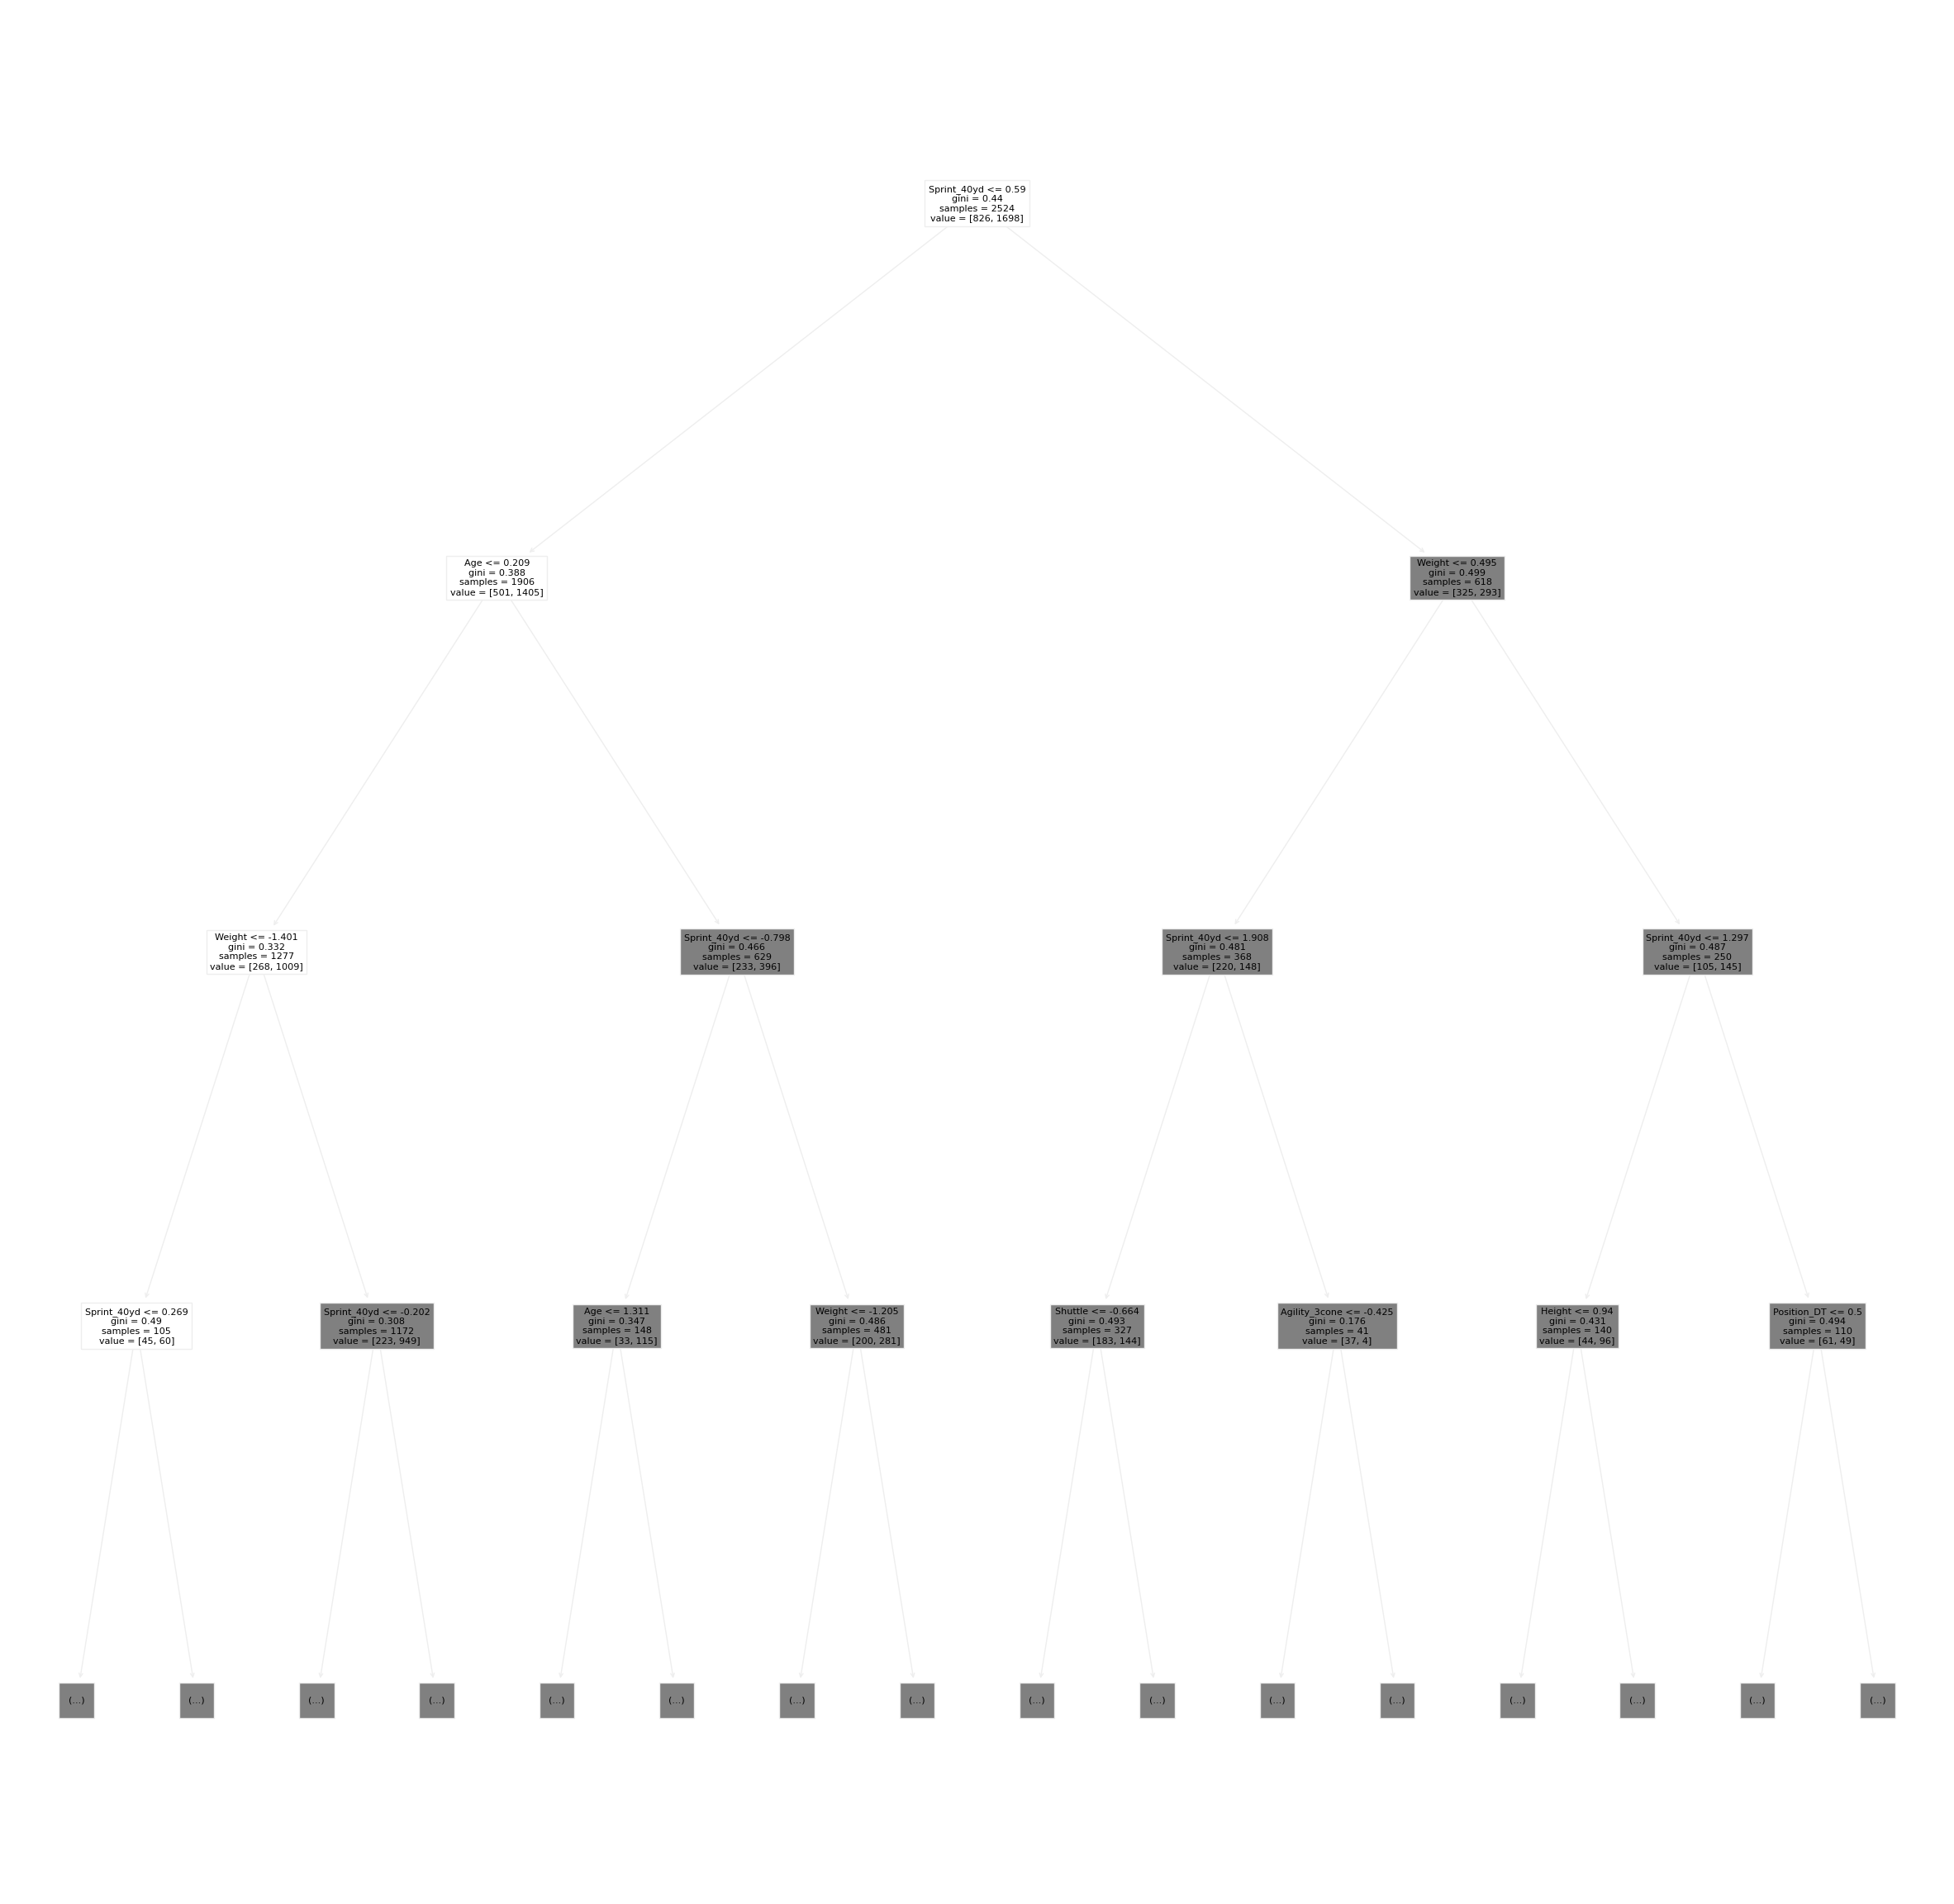

In [517]:
# Try dtreeviz at some point
from sklearn.tree import plot_tree, export_text

fig, ax = plt.subplots(figsize=(15,15), dpi=200)

plot_tree(dtc, max_depth=3, feature_names=X_train.columns ,ax=ax);

In [525]:
X_train.columns

Index(['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump',
       'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'BMI',
       'Position_C', 'Position_CB', 'Position_DE', 'Position_DT',
       'Position_FB', 'Position_FS', 'Position_ILB', 'Position_LS',
       'Position_OG', 'Position_OLB', 'Position_OT', 'Position_QB',
       'Position_RB', 'Position_S', 'Position_SS', 'Position_TE',
       'Position_WR', 'school_group_1', 'school_group_2', 'school_group_3'],
      dtype='object')

In [526]:
r = export_text(dtc, feature_names=list(X_train.columns))
print(r)

|--- Sprint_40yd <= 0.59
|   |--- Age <= 0.21
|   |   |--- Weight <= -1.40
|   |   |   |--- Sprint_40yd <= 0.27
|   |   |   |   |--- Vertical_Jump <= 0.89
|   |   |   |   |   |--- Sprint_40yd <= -0.08
|   |   |   |   |   |   |--- Broad_Jump <= 0.00
|   |   |   |   |   |   |   |--- Sprint_40yd <= -1.07
|   |   |   |   |   |   |   |   |--- Age <= 0.02
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  0.02
|   |   |   |   |   |   |   |   |   |--- Broad_Jump <= -0.80
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Broad_Jump >  -0.80
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Sprint_40yd >  -1.07
|   |   |   |   |   |   |   |   |--- Bench_Press_Reps <= -1.10
|   |   |   |   |   |   |   |   |   |--- Broad_Jump <= -0.16
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Broad_Jump >  -0.16
|   |   |   |   |   |   | 

**K Nearest Neighbors**

In [1371]:
# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit model
knn.fit(X_train, y_train)

# Get predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.50      0.59       826
           1       0.80      0.92      0.85      1772

    accuracy                           0.78      2598
   macro avg       0.77      0.71      0.72      2598
weighted avg       0.78      0.78      0.77      2598

              precision    recall  f1-score   support

           0       0.50      0.32      0.39       276
           1       0.73      0.85      0.78       590

    accuracy                           0.68       866
   macro avg       0.62      0.59      0.59       866
weighted avg       0.66      0.68      0.66       866



**Random Forest Classifier**

In [1372]:
# Instantiate RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Fit model
rfc.fit(X_train, y_train)

# Get predictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00      1772

    accuracy                           1.00      2598
   macro avg       1.00      1.00      1.00      2598
weighted avg       1.00      1.00      1.00      2598

              precision    recall  f1-score   support

           0       0.57      0.32      0.41       276
           1       0.74      0.89      0.81       590

    accuracy                           0.71       866
   macro avg       0.65      0.60      0.61       866
weighted avg       0.68      0.71      0.68       866



**XGBoost**

In [1373]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit model
xgb.fit(X_train, y_train)

# Get predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       826
           1       0.99      1.00      1.00      1772

    accuracy                           0.99      2598
   macro avg       1.00      0.99      0.99      2598
weighted avg       0.99      0.99      0.99      2598

              precision    recall  f1-score   support

           0       0.54      0.38      0.45       276
           1       0.75      0.85      0.79       590

    accuracy                           0.70       866
   macro avg       0.64      0.61      0.62       866
weighted avg       0.68      0.70      0.68       866



In [1220]:
param_grid_xgb = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3,4,5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.5, 0.7, 0.9],
    'n_estimators': [50, 75],
    'scale_pos_weight':[0.5, 0.75, 1]
}

In [1221]:
xgb_gridcv = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=3)

xgb_gridcv.fit(X_train, y_train)

best_parameters = xgb_gridcv.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
    
y_train_pred = xgb_gridcv.predict(X_train)
y_test_pred = xgb_gridcv.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 3
min_child_weight: 1
n_estimators: 50
scale_pos_weight: 1
subsample: 0.5
              precision    recall  f1-score   support

           0       0.75      0.42      0.54       826
           1       0.78      0.93      0.85      1772

    accuracy                           0.77      2598
   macro avg       0.76      0.68      0.69      2598
weighted avg       0.77      0.77      0.75      2598

              precision    recall  f1-score   support

           0       0.59      0.30      0.40       276
           1       0.73      0.90      0.81       590

    accuracy                           0.71       866
   macro avg       0.66      0.60      0.60       866
weighted avg       0.69      0.71      0.68       866



In [492]:
# XGBClassifier pipeline
xgb = XGBClassifier(learning_rate=0.1,
                    max_depth=3,
                    min_child_weight=2,
                    n_estimators=50,
                    scale_pos_weight=1,
                    subsample=0.5,
                    booster='gbtree')

pipe = Pipeline(steps=[
    ('impute_scale',FunctionTransformer(ImputeAndScaleByPosition)),
    ('dummies',FunctionTransformer(pd.get_dummies,kw_args={'columns':['Position','school_group']})),
    ('xgb',xgb)
])

df_test = df_combine[df_combine['Age'].isna()==False]

X = df_test[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_test['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.25)

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.44      0.55       815
           1       0.77      0.92      0.84      1687

    accuracy                           0.76      2502
   macro avg       0.75      0.68      0.69      2502
weighted avg       0.76      0.76      0.75      2502

              precision    recall  f1-score   support

           0       0.59      0.31      0.41       280
           1       0.72      0.89      0.80       555

    accuracy                           0.70       835
   macro avg       0.65      0.60      0.60       835
weighted avg       0.68      0.70      0.67       835



In [488]:
xgb.feature_importances_

array([0.07522838, 0.03672351, 0.05966902, 0.11116524, 0.04670209,
       0.0509274 , 0.04067383, 0.0629622 , 0.03953547, 0.04287845,
       0.        , 0.06114518, 0.        , 0.02126634, 0.04665513,
       0.        , 0.        , 0.        , 0.        , 0.05341676,
       0.        , 0.05530919, 0.        , 0.        , 0.        ,
       0.        , 0.06436897, 0.04163695, 0.0448288 , 0.0449071 ],
      dtype=float32)

In [489]:
# XGBClassifier pipeline with GridSearchCV
xgb = XGBClassifier()

param_grid_xgb = {
    'xgb__learning_rate': [0.1, 0.2],
    'xgb__max_depth': [3,4],
    'xgb__min_child_weight': [1, 2, 3],
    'xgb__subsample': [0.5, 0.7],
    'xgb__n_estimators': [50, 75],
    'xgb__scale_pos_weight':[0.5, 0.75, 1]
}

pipe = Pipeline(steps=[
    ('impute_scale',FunctionTransformer(ImputeAndScaleByPosition)),
    ('dummies',FunctionTransformer(pd.get_dummies,kw_args={'columns':['Position','school_group']})),
    ('xgb',xgb)
])

xgb_gridcv = GridSearchCV(pipe, param_grid=param_grid_xgb, cv=3)

X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

xgb_gridcv.fit(X_train, y_train)

best_parameters = xgb_gridcv.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

y_train_pred = xgb_gridcv.predict(X_train)
y_test_pred = xgb_gridcv.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

Grid Search found the following optimal parameters: 
xgb__learning_rate: 0.2
xgb__max_depth: 3
xgb__min_child_weight: 2
xgb__n_estimators: 50
xgb__scale_pos_weight: 1
xgb__subsample: 0.7
              precision    recall  f1-score   support

           0       0.77      0.50      0.61       826
           1       0.79      0.93      0.86      1698

    accuracy                           0.79      2524
   macro avg       0.78      0.71      0.73      2524
weighted avg       0.79      0.79      0.77      2524

              precision    recall  f1-score   support

           0       0.60      0.40      0.48       288
           1       0.73      0.86      0.79       554

    accuracy                           0.70       842
   macro avg       0.67      0.63      0.64       842
weighted avg       0.69      0.70      0.69       842



In [1222]:
print(np.sum(y_test),np.sum(y_test_pred))

590 726


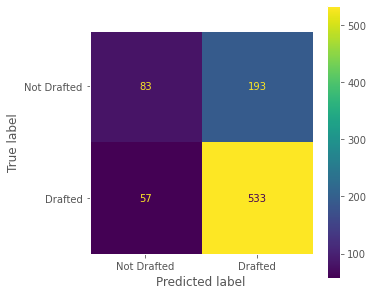

In [1223]:
cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)

### Naive Bayes Classifier

In [1602]:
class NaiveBayes:
    def __init__(self, split_by_position=None, categorical_cols=None):
        """
        Arguments:
        split_by_position: List of column names where the probabilities should be calculated
        for each position separately.
        
        categorical_thresh: Indicates which columns are categorical.
        """
        self.split_by_position = split_by_position
        self.categorical_cols = categorical_cols
        
    def fit(self, X, y):
        """
        Inputs:
        X: pandas dataframe of independent variables
        y: target variable
        """
        self.X = X
        self.y = y
        
    def predict(self, X, bias=1.0):
        """
        Input: 
        X: pandas DataFrame that matches the format of DataFrame used for fitting.
        bias: Number that indicates by how much to bias towards a positive prediction. Default is 1.0 (no bias).
        If bias is set to 'proportional', then the relative proportion of the target class is used
        """
        if bias == 'proportional': bias = sum(self.y==0)/sum(self.y==1)
        
        pred = []
        for i in X.index:
            logprob0 = np.log(sum(self.y==0)/len(self.y))
            logprob1 = np.log(sum(self.y==1)/len(self.y))
            
            for col in self.X.columns:
                
                if pd.isna(X.loc[i,col])==False:
                    
                    if col in self.categorical_cols:
                        
                        if col in self.split_by_position:
                            count0 = sum(self.y[(self.X[col]==X.loc[i,col]) & (self.X['Position']==X.loc[i,'Position'])]==0)
                            count1 = sum(self.y[(self.X[col]==X.loc[i,col]) & (self.X['Position']==X.loc[i,'Position'])]==1)
                            logprob0 += np.log(count0/(count0+count1))
                            logprob1 += np.log(count1/(count0+count1))
                            
                        else:
                            count0 = sum(self.y[self.X[col]==X.loc[i,col]]==0)
                            count1 = sum(self.y[self.X[col]==X.loc[i,col]]==1)
                            logprob0 += np.log(count0/(count0+count1))
                            logprob1 += np.log(count1/(count0+count1))
                        
                    else:
                    
                        if col in self.split_by_position:
                            mean0 = np.mean(self.X[(self.X['Position']==X.loc[i,'Position']) & (self.y==0)][col])
                            mean1 = np.mean(self.X[(self.X['Position']==X.loc[i,'Position']) & (self.y==1)][col])
                            std0 = np.std(self.X[(self.X['Position']==X.loc[i,'Position']) & (self.y==0)][col], ddof=1)
                            std1 = np.std(self.X[(self.X['Position']==X.loc[i,'Position']) & (self.y==1)][col], ddof=1)
                        
                        else:
                            mean0 = np.mean(self.X[self.y==0][col])
                            mean1 = np.mean(self.X[self.y==1][col])
                            std0 = np.std(self.X[self.y==0][col], ddof=1)
                            std1 = np.std(self.X[self.y==1][col], ddof=1)
                        
                        logprob0 += np.log(st.norm.pdf(X.loc[i,col], mean0, std0))
                        logprob1 += np.log(st.norm.pdf(X.loc[i,col], mean1, std1))
                        
            #print(np.exp(logprob0 - logprob1))
            if np.exp(logprob0 - logprob1) < bias:
                pred.append(1)
            else:
                pred.append(0)
                
        return pd.Series(pred, index=X.index)

In [1635]:
# Define X and y
X = df_combine[['Age','Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI','Position','school_group']]
y = df_combine['Drafted']
#y = df_combine['pro_bowlYN']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size=0.25)

split_cols = ['Height','Weight','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone',
             'Shuttle','BMI']
cat_cols = ['Position','school_group']

nb = NaiveBayes(split_by_position=split_cols, categorical_cols=cat_cols)

nb.fit(X_train, y_train)

y_train_pred = nb.predict(X_train, bias='proportional')
y_test_pred = nb.predict(X_test, bias='proportional')

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1761: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1762: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1761: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1762: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1761: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) 

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1761: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1762: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1761: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1762: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1761: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) 

In [1636]:
print(classification_report(y_train,y_train_pred))
print()
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.37      0.49       874
           1       0.75      0.92      0.83      1807

    accuracy                           0.74      2681
   macro avg       0.73      0.65      0.66      2681
weighted avg       0.74      0.74      0.72      2681


              precision    recall  f1-score   support

           0       0.61      0.33      0.43       306
           1       0.72      0.89      0.80       588

    accuracy                           0.70       894
   macro avg       0.67      0.61      0.61       894
weighted avg       0.68      0.70      0.67       894



In [1626]:
#120
print(classification_report(y_train,y_train_pred))
print()
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.42      0.53       917
           1       0.75      0.92      0.83      1764

    accuracy                           0.75      2681
   macro avg       0.74      0.67      0.68      2681
weighted avg       0.75      0.75      0.73      2681


              precision    recall  f1-score   support

           0       0.55      0.38      0.45       263
           1       0.77      0.87      0.82       631

    accuracy                           0.73       894
   macro avg       0.66      0.63      0.63       894
weighted avg       0.71      0.73      0.71       894



In [1560]:
df_results = df_combine.loc[y_test_pred.index]
df_results['predict'] = y_test_pred
df_results['correct'] = df_results['Drafted']*df_results['predict'] + (1-df_results['Drafted'])*(1-df_results['predict'])
df_results.describe()

Year         Age      Height      Weight  Sprint_40yd  \
count   866.000000  859.000000  866.000000  866.000000   820.000000   
mean   2014.159353   21.994179    1.875597  110.729440     4.768512   
std       3.088298    0.984123    0.067523   20.370341     0.297462   
min    2009.000000   18.000000    1.676400   72.574779     4.220000   
25%    2011.000000   21.000000    1.828800   93.553426     4.530000   
50%    2014.000000   22.000000    1.879600  107.047799     4.690000   
75%    2017.000000   23.000000    1.930400  126.779067     4.950000   
max    2019.000000   26.000000    2.032000  161.025291     6.000000   

       Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone     Shuttle  \
count     687.000000        655.000000  675.000000     566.000000  579.000000   
mean       83.446579         20.612214  291.964533       7.250654    4.402487   
std        10.764149          6.636649   24.003039       0.423246    0.264096   
min        50.800000          3.000000  208.280000       6.280000    3.810000   
25%        76.200000         16.000000  279.400000       6.950000    4.210000   
50%        83.820000         20.000000  294.640000       7.150000    4.360000   
75%        90.170000         25.000000  307.340000       7.487500    4.550000   
max       114.300000         42.000000  358.140000       9.040000    5.560000   

              BMI     Drafted   pro_bowls  Missing_Athletic_Tests  \
count  866.000000  866.000000  866.000000              866.000000   
mean    31.300302    0.681293    0.299076                1.401848   
std      4.407575    0.466244    1.097311                1.798573   
min     22.315242    0.000000    0.000000                0.000000   
25%     27.695718    0.000000    0.000000                0.000000   
50%     30.430643    1.000000    0.000000                0.000000   
75%     34.360659    1.000000    0.000000                2.000000   
max     43.669737    1.000000   10.000000                6.000000   

       school_group     predict     correct  
count    866.000000  866.000000  866.000000  
mean       1.882217    0.881062    0.719400  
std        0.821662    0.323902    0.449552  
min        1.000000    0.000000    0.000000  
25%        1.000000    1.000000    0.000000  
50%        2.000000    1.000000    1.000000  
75%        3.000000    1.000000    1.000000  
max        3.000000    1.000000    1.000000

In [1598]:
# Define X and y
X = df_combine[['school_group','Position']]
y = df_combine['pro_bowlYN']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

split_cols = []
cat_cols = ['Position']

nb = NaiveBayes(split_by_position=split_cols, categorical_cols=cat_cols)

nb.fit(X_train, y_train)

y_train_pred = nb.predict(X_train, bias='proportional')
y_test_pred = nb.predict(X_test, bias='proportional')

<ipython-input-1550-4e150e582583>:52: RuntimeWarning: divide by zero encountered in log
  logprob1 += np.log(count1/(count0+count1))
<ipython-input-1550-4e150e582583>:52: RuntimeWarning: divide by zero encountered in log
  logprob1 += np.log(count1/(count0+count1))
<ipython-input-1550-4e150e582583>:52: RuntimeWarning: divide by zero encountered in log
  logprob1 += np.log(count1/(count0+count1))
<ipython-input-1550-4e150e582583>:52: RuntimeWarning: divide by zero encountered in log
  logprob1 += np.log(count1/(count0+count1))
<ipython-input-1550-4e150e582583>:52: RuntimeWarning: divide by zero encountered in log
  logprob1 += np.log(count1/(count0+count1))
<ipython-input-1550-4e150e582583>:52: RuntimeWarning: divide by zero encountered in log
  logprob1 += np.log(count1/(count0+count1))
<ipython-input-1550-4e150e582583>:52: RuntimeWarning: divide by zero encountered in log
  logprob1 += np.log(count1/(count0+count1))
<ipython-input-1550-4e150e582583>:52: RuntimeWarning: divide by zero 

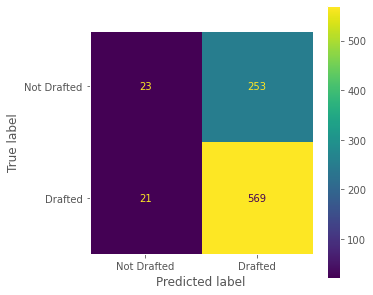

In [1565]:
cf = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
ConfusionMatrixDisplay(cf, display_labels=['Not Drafted', 'Drafted']).plot(ax=ax)